## Introduction

In [481]:
#Import the pandas, numpy libraries as pd, and np respectively. 
import os
import json
import pandas as pd 
import calendar
import numpy as np
from matplotlib.ticker import FuncFormatter
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt 
pd.options.display.max_colwidth = 80
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500
%matplotlib inline
sns.set_style('darkgrid')

#### Load Data

In [482]:
train_data = pd.read_csv('Housing-data/train.csv',  index_col = 'Id')
test_data = pd.read_csv('Housing-data/test.csv',  index_col = 'Id')
#Separating feature and target variables
X_train = train_data[[c for c in train_data.columns if c!='SalePrice']]
y = train_data.SalePrice
#Concatenate train and test data for independent variables
X = pd.concat([X_train, test_data], axis=0)
X.shape

(2919, 79)

### Note: 
When we perform the cleaning of the dataset we'll need to do the whole cleaning process for training data first then we'll do the same data cleaning process for the test dataset too. So to avoid doing the same data cleaning process twice, we merge the training and testing data then we perform the data cleaning process and after that we separate both dataset.

#### Data Description

In [483]:
X_train.describe(include='all')

MSSubClass MSZoning  LotFrontage        LotArea Street Alley  \
count   1460.000000     1460  1201.000000    1460.000000   1460    91   
unique          NaN        5          NaN            NaN      2     2   
top             NaN       RL          NaN            NaN   Pave  Grvl   
freq            NaN     1151          NaN            NaN   1454    50   
mean      56.897260      NaN    70.049958   10516.828082    NaN   NaN   
std       42.300571      NaN    24.284752    9981.264932    NaN   NaN   
min       20.000000      NaN    21.000000    1300.000000    NaN   NaN   
25%       20.000000      NaN    59.000000    7553.500000    NaN   NaN   
50%       50.000000      NaN    69.000000    9478.500000    NaN   NaN   
75%       70.000000      NaN    80.000000   11601.500000    NaN   NaN   
max      190.000000      NaN   313.000000  215245.000000    NaN   NaN   

       LotShape LandContour Utilities LotConfig LandSlope Neighborhood  \
count      1460        1460      1460      1460      1460         1460   
unique        4           4         2         5         3           25   
top         Reg         Lvl    AllPub    Inside       Gtl        NAmes   
freq        925        1311      1459      1052      1382          225   
mean        NaN         NaN       NaN       NaN       NaN          NaN   
std         NaN         NaN       NaN       NaN       NaN          NaN   
min         NaN         NaN       NaN       NaN       NaN          NaN   
25%         NaN         NaN       NaN       NaN       NaN          NaN   
50%         NaN         NaN       NaN       NaN       NaN          NaN   
75%         NaN         NaN       NaN       NaN       NaN          NaN   
max         NaN         NaN       NaN       NaN       NaN          NaN   

       Condition1 Condition2 BldgType HouseStyle  OverallQual  OverallCond  \
count        1460       1460     1460       1460  1460.000000  1460.000000   
unique          9          8        5          8          NaN          NaN   
top          Norm       Norm     1Fam     1Story          NaN          NaN   
freq         1260       1445     1220        726          NaN          NaN   
mean          NaN        NaN      NaN        NaN     6.099315     5.575342   
std           NaN        NaN      NaN        NaN     1.382997     1.112799   
min           NaN        NaN      NaN        NaN     1.000000     1.000000   
25%           NaN        NaN      NaN        NaN     5.000000     5.000000   
50%           NaN        NaN      NaN        NaN     6.000000     5.000000   
75%           NaN        NaN      NaN        NaN     7.000000     6.000000   
max           NaN        NaN      NaN        NaN    10.000000     9.000000   

          YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
count   1460.000000   1460.000000      1460     1460        1460        1460   
unique          NaN           NaN         6        8          15          16   
top             NaN           NaN     Gable  CompShg     VinylSd     VinylSd   
freq            NaN           NaN      1141     1434         515         504   
mean    1971.267808   1984.865753       NaN      NaN         NaN         NaN   
std       30.202904     20.645407       NaN      NaN         NaN         NaN   
min     1872.000000   1950.000000       NaN      NaN         NaN         NaN   
25%     1954.000000   1967.000000       NaN      NaN         NaN         NaN   
50%     1973.000000   1994.000000       NaN      NaN         NaN         NaN   
75%     2000.000000   2004.000000       NaN      NaN         NaN         NaN   
max     2010.000000   2010.000000       NaN      NaN         NaN         NaN   

       MasVnrType   MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
count        1452  1452.000000      1460      1460       1460     1423   
unique          4          NaN         4         5          6        4   
top          None          NaN        TA        TA      PConc       TA   
freq          864          NaN       906      128

In [484]:
print("Train Data Size is: " ,X_train.shape)
print("Test Data Size is: " ,test_data.shape)

Train Data Size is:  (1460, 79)
Test Data Size is:  (1459, 79)


In [485]:
#Finding Numerical and Categorical columns:
numeric_feat = list(X_train.select_dtypes(exclude='object').columns)
print(f"There are {len(numeric_feat)} numerical features:\n", numeric_feat)

There are 36 numerical features:
 ['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [486]:
categ_feat = list(X_train.select_dtypes(include='object').columns)
print(f"There are {len(categ_feat)} categorical features:\n", categ_feat)

There are 43 categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## 2. Exploratory Data Analysis

### 2.1 Sale Price

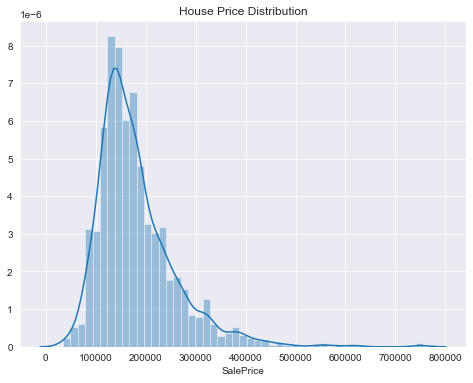

In [487]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")

The distribution of SalePrice is right skewed. Which means most  houses cost a modest amount while a few cost very large. 

In [488]:
print(f"""Skewness: {y.skew()}
Kurtosis: {y.kurt()}""")

Skewness: 1.8828757597682129
Kurtosis: 6.536281860064529


### 2.2 Numerical Features

We are trying to find top 10 numerical variables highly correlated with SalePrice:

In [489]:
corr_mat = train_data.corr().SalePrice.sort_values(ascending=False)
corr_mat.head(11)

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

We will be using RFE(Recursive Feature Elimination)to find the top 10 features

In [490]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=10, step=1)
selector = rfe.fit(X_train.fillna(0).select_dtypes(exclude='object'), y)
selectedFeatures = list(
    X.select_dtypes(exclude='object').columns[selector.support_])
selectedFeatures

['OverallQual',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars']

According to above analyses, Overall Quality, Living Area, Number of Full Baths, Size of Garage and Year Built are some of the most important features in determining house price. We will  take a closer look at them

#### Overall Quality
Overall quality is the most important feature in both analyses. It is clear that higher quality makes the house more expensive.

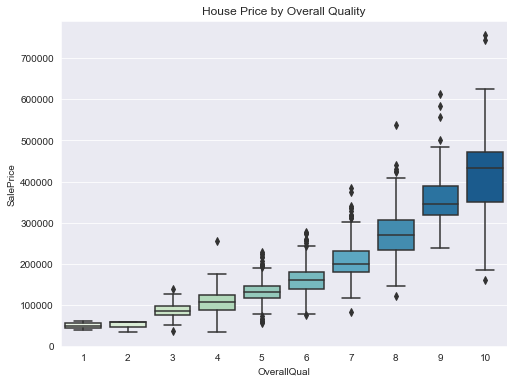

In [491]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Overall Quality')

#### Living Area

Living area has a linear relationship with house price. In the scatter plot below, we can clearly see some outliers in the data, especially the two houses in the lower-right corner with living area greater than 4000 sqft and price lower than $200,000.

Correlation:  0.7086244776126511


<Figure size 432x432 with 0 Axes>

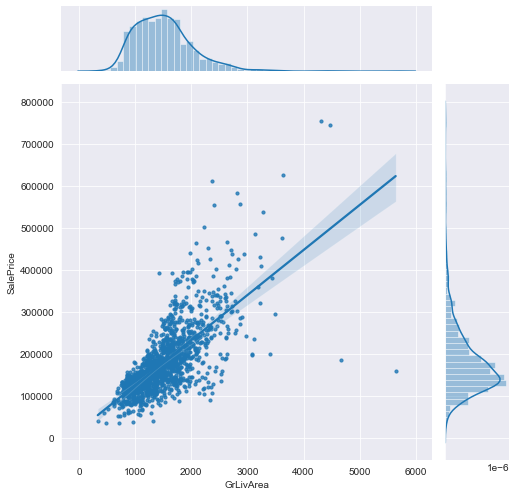

In [492]:
def corrPlot(variables):
    """
    1. Print correlation of two variables
    2. Create jointplot of two variables
    """
    print("Correlation: ", train_data[[variables[0],
                                       variables[1]]].corr().iloc[1, 0])

    # Create jointplot
    plt.figure(figsize=(6, 6))
    sns.jointplot(train_data[(variables[0])],
                  train_data[(variables[1])],
                  kind='reg',
                  height=7,
                  scatter_kws={'s': 10},
                  marginal_kws={'kde': True})


corrPlot(['GrLivArea', 'SalePrice'])

#### GarageCars

Interestingly, 4-car garage houses seem to be chepaer than 3-car garage ones.

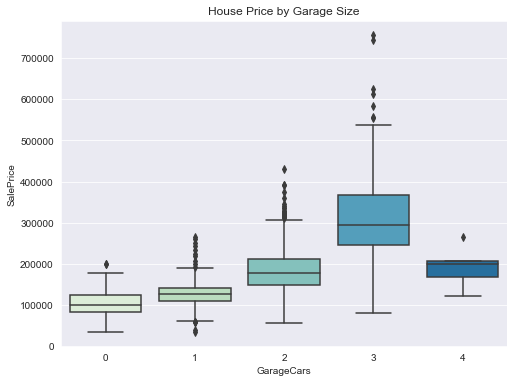

In [493]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=train_data, palette='GnBu')
title = plt.title('House Price by Garage Size')

#### Year Built

The age of the house also plays an important role in its price. Newer houses have higher average prices. There are several houses built before 1900 having a high price.

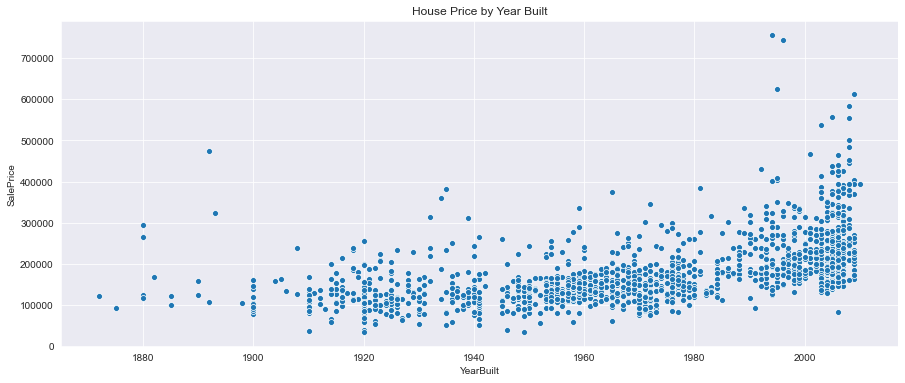

In [494]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=train_data)
title = plt.title('House Price by Year Built')

### 2.3. Categorical Variables
Using ANOVA, I have identified 15 categorical features having p-values lower than 0.01:

In [495]:
impCatCols = [
    'Street', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
    'Condition1', 'Condition2', 'RoofMatl', 'ExterQual', 'BsmtQual',
    'BsmtExposure', 'KitchenQual', 'Functional', 'GarageQual', 'PoolQC'
]

In [496]:
def visualizeCatFeature(feature):

    # Visualize the relationship between `SalePrice` and categorical feature using box plots
    # Descending order of levels sorted by median SalePrice
    featOrder = train_data.groupby(
        [feature]).median().SalePrice.sort_values(ascending=False).index

    # Create box plot
    sns.boxplot(x=feature,
                y='SalePrice',
                data=train_data,
                order=featOrder,
                palette='GnBu_r')

#### Neighborhood

There is a big difference in house prices among neighborhood in Ames. The top 3 expensive neighborhoods are NridgHt, NoRidge and StoneBr with median house prices of approximately $300,000, three times as high as the median of the 3 cheapest neighborhoods, which are BrDale, DOTRR and MeadowV.

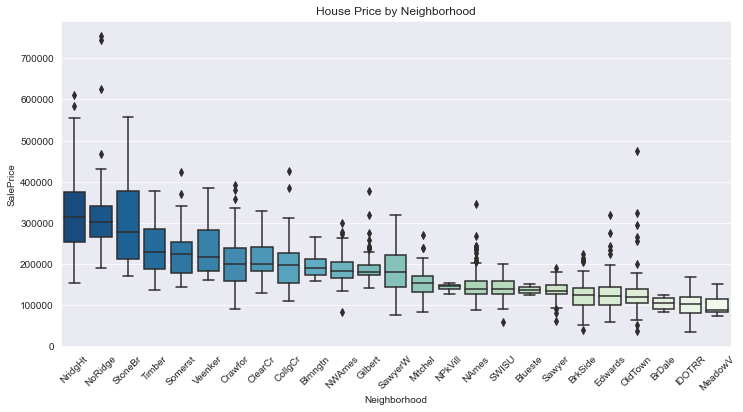

In [497]:
plt.figure(figsize=(12, 6))
visualizeCatFeature('Neighborhood')
title = plt.title('House Price by Neighborhood')
tick = plt.xticks(rotation=45)

#### Roof Material

Houses using Wood Shingles roof are the most expensive with price ranging from $300,000 to \$450,000. There are also a lot of expensive houses using Standard Composite Shingle roof.

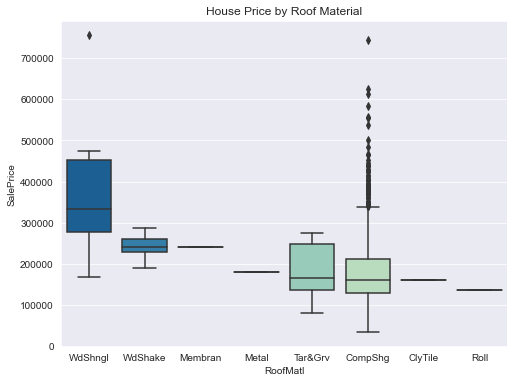

In [498]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('RoofMatl')
title = plt.title('House Price by Roof Material')

#### Kitchen Quality

Kitchen Quality is another important feature to predict house price. There is a very big difference in price between houses with different kitchen quality. For example, the average price difference between a house with a good kitchen and one with an excellent kitchen is about $120,000.

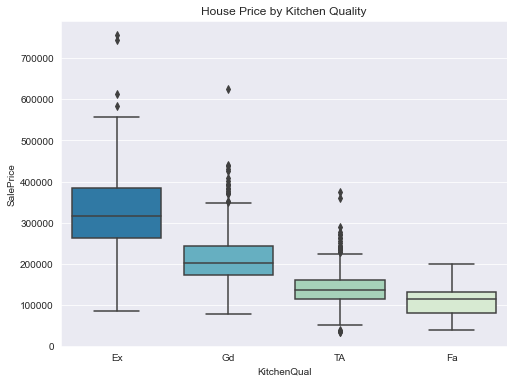

In [499]:
plt.figure(figsize=(8, 6))
visualizeCatFeature('KitchenQual')
title = plt.title('House Price by Kitchen Quality')

### 2.4 Correlations

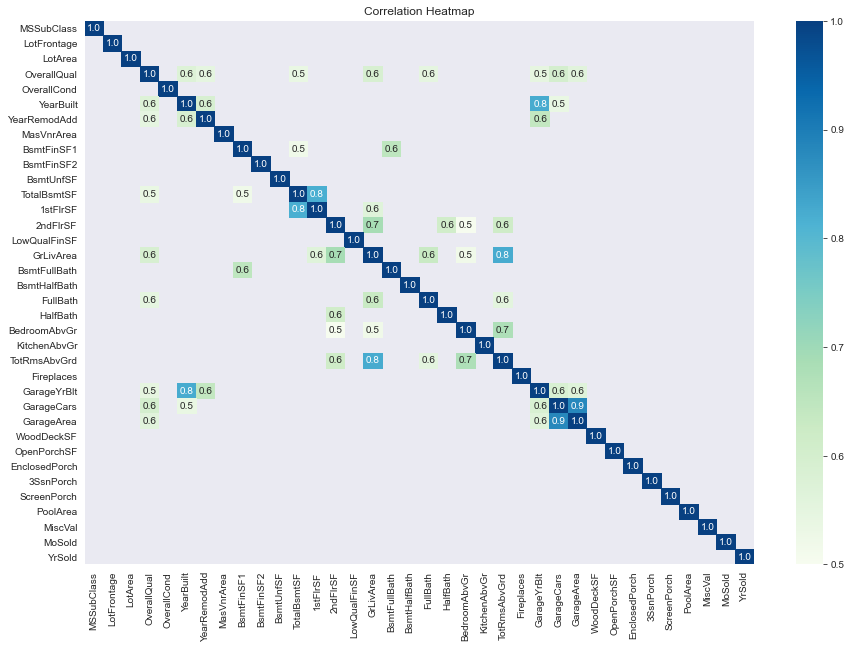

In [500]:
# Create correlation matrix from train data excluding `SalePrice`
corr_mat = train_data.iloc[:, :-1].corr()

# Select correlations greater than 0.5
high_corr_mat = corr_mat[abs(corr_mat) >= 0.5]

# Plot correlation heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(high_corr_mat,
            annot=True,
            fmt='.1f',
            cmap='GnBu',
            vmin=0.5,
            vmax=1)
title = plt.title('Correlation Heatmap')

There is multicollinearity in our training data. Below features are highly correlated:

- GarageCars and GarageArea
- GarageYrBlt and YearBuilt
- 1stFlrSF and TotalBsmtSF
- GrLivArea and TotRmsAbvGrd

## 3. Data Preprocessing and Feature Engineering

### 3.1. Missing Values
Most machine learning algorithms give an error when we train them on data with missing values. Therefore, it's important to identify them before deciding how to handle them (drop features or impute missing value).

In [501]:
missing_data_count = X.isnull().sum()
missing_data_percent = X.isnull().sum() / len(X) * 100

missing_data = pd.DataFrame({
    'Count': missing_data_count,
    'Percent': missing_data_percent
})
missing_data = missing_data[missing_data.Count > 0]
missing_data.sort_values(by='Count', ascending=False, inplace=True)

print(f"There are {missing_data.shape[0]} features having missing data.\n")
print("Top 10 missing value features:")
missing_data.head(10)

There are 34 features having missing data.

Top 10 missing value features:


Count    Percent
PoolQC         2909  99.657417
MiscFeature    2814  96.402878
Alley          2721  93.216855
Fence          2348  80.438506
FireplaceQu    1420  48.646797
LotFrontage     486  16.649538
GarageFinish    159   5.447071
GarageQual      159   5.447071
GarageCond      159   5.447071
GarageYrBlt     159   5.447071

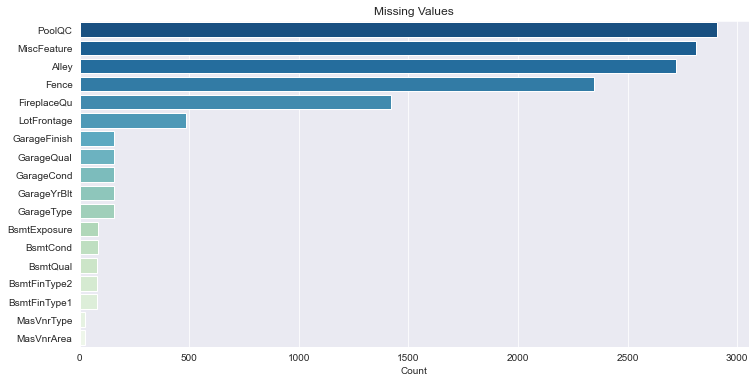

In [502]:
plt.figure(figsize=(12, 6))
sns.barplot(y=missing_data.head(18).index,
            x=missing_data.head(18).Count,
            palette='GnBu_r')
title = plt.title("Missing Values")

34 features that have missing values. Here is how I did the imputations:

Group 1 - Categorical variables: PoolQC, MiscFeature, Alley, Fence, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, MasVnrType (15 variables)

For this group I will impute NA with 'None'.

Group 2 - GarageArea, GarageCars, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, MasVnrArea, Functional, MSZoning, Electrical, KitchenQual, Exterior1st, Exterior2nd, SaleType, Utilities, LotFrontage, GarageYrBlt

For this group I will impute the null values with their respective'mean'.

I will impute GarageYrBlt with YearBuilt.

##### I am not dropping any columns. Doing isnull() on columns that have NaNs in them. There are 34 columns(found 
from len(null_list)) with NaNs. isnull() returns Trues and Falses

In [503]:
list_null_columns = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType', 'GarageFinish',
                     'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
                     'MasVnrType','GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                     'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea', 'Functional', 'MSZoning', 'Electrical', 'KitchenQual', 
                     'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities', 'LotFrontage', 'GarageYrBlt']
list_with_isnull = []
for i in list_null_columns:
    s = i + '_isnull'
    list_with_isnull.append(s)
#list_with_isnull

In [504]:
list_with_isnull = ['PoolQC_isnull','MiscFeature_isnull','Alley_isnull','Fence_isnull','FireplaceQu_isnull','GarageType_isnull','GarageFinish_isnull','GarageQual_isnull','GarageCond_isnull','BsmtQual_isnull',
 'BsmtCond_isnull','BsmtExposure_isnull','BsmtFinType1_isnull','BsmtFinType2_isnull','MasVnrType_isnull','GarageArea_isnull',
 'GarageCars_isnull','BsmtFinSF1_isnull','BsmtFinSF2_isnull','BsmtUnfSF_isnull','TotalBsmtSF_isnull','BsmtFullBath_isnull',
 'BsmtHalfBath_isnull','MasVnrArea_isnull','Functional_isnull','MSZoning_isnull','Electrical_isnull','KitchenQual_isnull',
 'Exterior1st_isnull','Exterior2nd_isnull','SaleType_isnull','Utilities_isnull','LotFrontage_isnull','GarageYrBlt_isnull']
for i,j in zip(list_with_isnull,list_null_columns): #Looping over lists simultaneously
    X[i] = X[j].isnull()

Testing if the .isnull() opertaion on th efeatures actually worked by counting total null values in the new and old columns

In [505]:
X["GarageCond"].isnull().sum()

159

In [506]:
X["GarageCond_isnull"].value_counts()

False    2760
True      159
Name: GarageCond_isnull, dtype: int64

In [507]:
# The total columns now will be 79+34 = 113
X.shape 

(2919, 113)

In [508]:
from sklearn.impute import SimpleImputer
cat_group_1 = [
    'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageType',
    'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond',
    'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType'
]
X[cat_group_1] = X[cat_group_1].fillna("None")

num_group_2 = [
     'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
     'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'] 

X[num_group_2] = X[num_group_2].fillna(value=X[num_group_2].mean())

other_group_3 = ['Functional', 'MSZoning', 'Electrical', 'KitchenQual', 
     'Exterior1st', 'Exterior2nd', 'SaleType', 'Utilities']


imputer = SimpleImputer(strategy='most_frequent')
X[other_group_3] = pd.DataFrame(imputer.fit_transform(X[other_group_3]), index=X.index)

X.LotFrontage = X.LotFrontage.fillna(X.LotFrontage.mean())
X.GarageYrBlt = X.GarageYrBlt.fillna(X.YearBuilt)

In [509]:
#Checking if any more missing values exist:
sum(X.isnull().sum())

0

### 3.2 Feature Engineering

#### 3.2.1. Create New Variables
New Features from weaker features are created. For example, we see that the surface area of each floor has low correlation with the SalePrice, however, summing up the total square feet will strengthen the relationship, like the created feature "totalSqFeet" becomes much stronger.

In [510]:
X['totalSqFeet'] = X['TotalBsmtSF'] + X['1stFlrSF'] + X['2ndFlrSF']
X['totalBathroom'] = X.FullBath + X.BsmtFullBath + 0.5 * (X.HalfBath + X.BsmtHalfBath)
X['ageOfHouse'] = X.YrSold - X.YearBuilt
X['reModeled'] = np.where(X.YearRemodAdd == X.YearBuilt, 0, 1) #If equal, value set to 0, otherwise to 1
X['isNew'] = np.where(X.YrSold == X.YearBuilt, 1, 0) #If equal, value set to 1, otherwise to 0

#### 3.2.2. Label Encoding
Ordinal categorical features are label encoded.

In [511]:
from sklearn.preprocessing import LabelEncoder

# Ordinal categorical columns
ord_cat_cols = [
    "Alley", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2",
    "BsmtQual", "ExterCond", "ExterQual", "FireplaceQu", "Functional",
    "GarageCond", "GarageQual", "HeatingQC", "KitchenQual", "LandSlope",
    "LotShape", "PavedDrive", "PoolQC", "Street", "Utilities"
]

# Apply Label Encoder
label_encoder = LabelEncoder()

for col in ord_cat_cols:
    X[col] = label_encoder.fit_transform(X[col])

In [512]:
X.GarageCond.unique() #Checking label encoded unique values assigned to 'GarageCond'

array([5, 1, 3, 2, 4, 0])

#### 3.2.3. Transform Numerical Variables to Categorical Variables
Because age of houses has been calculated, YearBuilt is no longer needed. However, YrSold could have a large impact on the SalePrice, like during recession, crisis, house prices could be lower, etc). I will transform it into categorical variables.

Like YrSold, some numerical variables don't have any ordinal meaning, e.g. MoSold(probably just indicates which month of year it was sold), MSSubClass, etc. I will transform them into categorical variables.

In [513]:
X[['YrSold', 'MoSold', 'MSSubClass']].head() #Looking at the values first before transformation

YrSold  MoSold  MSSubClass
Id                            
1     2008       2          60
2     2007       5          20
3     2008       9          60
4     2006       2          70
5     2008      12          60

In [514]:
num_to_cat_cols = ['YrSold', 'MoSold', 'MSSubClass']

for i in num_to_cat_cols:
    X[i] = X[i].apply(str)

### 3.3. Skewness and Normalizing Variables
We want to transform our skewed data so that our model performs better. Linear Regression relies on the assumption of  Normal Distribution. 

We examine the target variable SalePrice with Distribution plot and Quantile-Quantile plot.

In [515]:
def normality_plot(X):
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(X, fit=norm, ax=axes[0])
    axes[0].set_title('Distribution Plot')

    axes[1] = stats.probplot((X), plot=plt)
    plt.tight_layout()

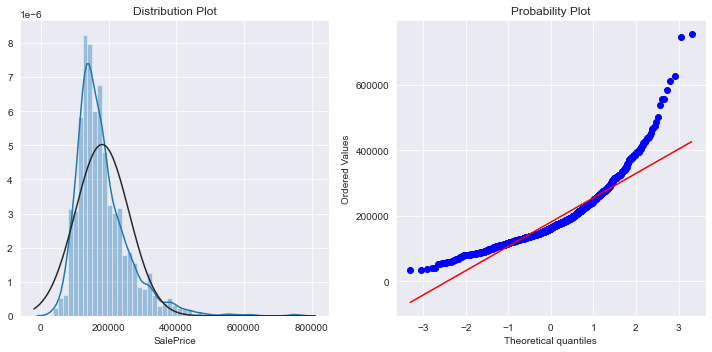

In [516]:
normality_plot(y) #Calling the function on SalePrice

One of the methods to normalize right-skewed data is using log transformation.It helps to pull the large values towards the center. log(0) is Nan, so I will use log(1+X) to fix skewness. 

In [517]:
y = np.log(1 + y)

Checking SalePrice after log transformation. The sknewness has been fixed.

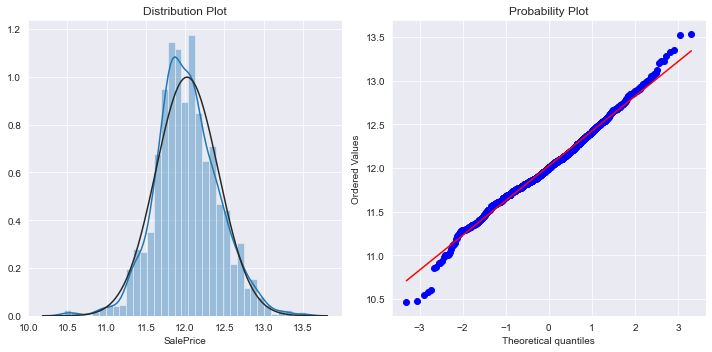

In [518]:
normality_plot(y)

#### Fixing skewness in other numerical variables

If skewness is less than -1 or greater than 1, the distribution is highly skewed.

If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed.

If skewness is between -0.5 and 0.5, the distribution is almost symmetric.

Below are skewed features in our original train data.

In [519]:
skewed_feats = train_data.skew().sort_values(ascending=False)
skewed_feats[abs(skewed_feats) > 0.75]

MiscVal          24.476794
PoolArea         14.828374
LotArea          12.207688
3SsnPorch        10.304342
LowQualFinSF      9.011341
KitchenAbvGr      4.488397
BsmtFinSF2        4.255261
ScreenPorch       4.122214
BsmtHalfBath      4.103403
EnclosedPorch     3.089872
MasVnrArea        2.669084
OpenPorchSF       2.364342
LotFrontage       2.163569
SalePrice         1.882876
BsmtFinSF1        1.685503
WoodDeckSF        1.541376
TotalBsmtSF       1.524255
MSSubClass        1.407657
1stFlrSF          1.376757
GrLivArea         1.366560
BsmtUnfSF         0.920268
2ndFlrSF          0.813030
dtype: float64

Now Checking Normality of "GrLivArea"

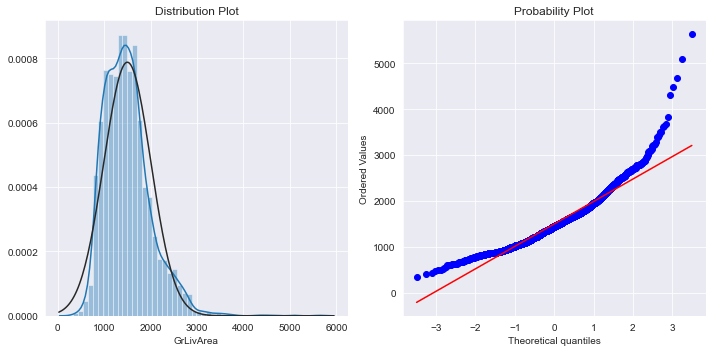

In [520]:
normality_plot(X.GrLivArea)

if we find the list of numeric features, we will see 'MSSubClass', which "identifies the type of dwelling involved in the sale". It is encoded as numeric but is in reality a categorical variable. So, below in the Transformation of the skewed columns, we will exclude 'MSSubClass' as well as 'SalePrice'

In [521]:
# List of skewed columns
skewed_cols = list(skewed_feats[abs(skewed_feats) > 0.5].index)

# Remove 'MSSubClass' and 'SalePrice'
skewed_cols = [
    i for i in skewed_cols if i not in ['MSSubClass', 'SalePrice']
]

# Log-transform skewed columns
for j in skewed_cols:
    X[j] = np.log(1 + X[j])

Checking Normality of "GrLivArea" after log transformation

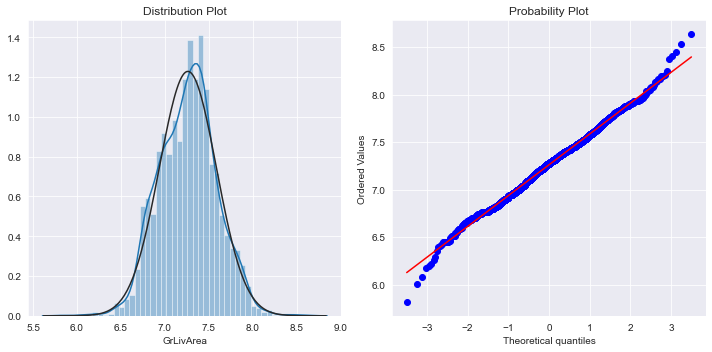

In [522]:
normality_plot(X.GrLivArea)

### 3.4 Feature Scaling

We need to standardize the dataset. I will use RobustScaler to transform the training data. 

In [471]:
numerical_cols = list(X.select_dtypes(exclude=['object']).columns)
scaler = RobustScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### 3.5 One Hot Encoding

In [472]:
X = pd.get_dummies(X, drop_first=True)
X.shape

(2919, 272)

Splitting Train and Test Data now for Modeling

In [473]:
lenTest = len(test_data)
X_train = X.iloc[:-lenTest, :]
X_test = X.iloc[-lenTest:, :]
print("X_train.shape:", X_train.shape)
print("X_test.shape:", X_test.shape)

X_train.shape: (1460, 272)
X_test.shape: (1459, 272)


## Modeling

We will first split the Training data into train and test data to see how the model behaves initially and before trying other advanced models. We will come up with a hyperparameter table. 

In [524]:
X2 = X_train
y2 = y
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.2, random_state=4)
X_train = pd.DataFrame(X_train, columns=X2.columns)
X_test = pd.DataFrame(X_test, columns=X2.columns)
y2_train = pd.Series(y2_train)
y2_train.name = y2.name
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

In [525]:
hyperp_table = []
print(len(hyperp_table))
linear_model = LinearRegression()
linear_model.fit(X2_train, y2_train)
y2_pred_train = linear_model.predict(X2_train)
y2_pred_test = linear_model.predict(X2_test)
results = {} #creating an empty dictionary which, later will feed into the hyper parameter table(a list)
results['rmse_train'] = ((y2_pred_train - y2_train)**2).mean()**.5
results['rmse_test'] = ((y2_pred_test - y2_test)**2).mean()**.5
results['model'] = linear_model.__class__.__name__#We are changing how we are creating 'results' so that 
#it's already a string. If we add dunder.name__(dunder_)
results['feature_names'] = ",".join(list(X2.columns))
hyperp_table.append(results)
json.dump(hyperp_table, open("hyperp_table.json", 'w'), indent=2)
hyperp_table

0


[{'rmse_train': 0.09383716910898295,
  'rmse_test': 13283810192.08257,
  'model': 'LinearRegression',
  'feature_names': 'MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition'}]

14


[{'rmse_train': 19842.795258219627,
  'rmse_test': 59988.481645990774,
  'model': 'LinearRegression',
  'feature_names': 'Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,LotFrontaget_isnull,Alley_isnull,MasVnrType_isnull,MasVnrArea_isnull,BsmtQual_isnull,BsmtCond_isnull,BsmtExposure_isnull,BsmtFinType1t_isnull,BsmtFinType2_isnull,Electrical_isnull,FireplaceQu_isnull,GarageType_isnull,GarageFinish_isnull,GarageQual_isnull,GarageYrBlt_isnull,GarageCond_isnull,PoolQC_isnull,Fence_isnull,MiscFeature_isnull,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,LotShape_IR2,LotShape

In [207]:
df_hyper = pd.DataFrame(hyperp_table)
df_hyper.sort_values('rmse_test')

rmse_train     rmse_test             model  \
14  18926.136062  49829.818116  LinearRegression   
13  18926.136059  49829.843923  LinearRegression   
12  19096.439813  51402.405484  LinearRegression   
11  19099.406806  51620.836354  LinearRegression   
10  19104.151320  51704.136616  LinearRegression   
9   19119.170931  51879.004612  LinearRegression   
8   19137.241874  52988.766691  LinearRegression   
7   19164.423768  54820.656465  LinearRegression   
3   19192.754031  54858.592796  LinearRegression   
5   19191.157113  54872.514517  LinearRegression   
4   19192.447907  54899.954873  LinearRegression   
6   19166.238227  55006.433811  LinearRegression   
0   19842.795258  59988.481646  LinearRegression   
2   19672.138123  60210.920672  LinearRegression   
1   19694.201703  60247.596006  LinearRegression   

                                                                      feature_names  
14  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
13  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
12  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
11  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
10  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
9   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
8   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
7   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
3   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
5   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
4   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
6   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
0   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
2   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...  
1   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...

In [208]:
descriptions = pd.Series([
    "RMSE values without any transformation done on Model",
    "Adding log transform for the feature 'MasVnrArea'",
    "Adding log transform for the feature 'LotFrontage'",
    "Adding Polynomial for the feature 'OverallQual'",
    "Adding Polynomial for the feature 'LotArea'",
    "Adding Polynomial for the feature 'BsmtUnfSF'",
    "Adding square root for the feature 'MasVnrArea'",
    "Adding square root for the feature '1stFlrSF'",
    "Adding square root for the feature 'GrLivArea'",
    "Adding square root for the feature 'BsmtFinSF1'",
    "Adding Polynomial(square) for the feature 'TotalBsmtSF'",
    "Adding a new feature for 'YearBuilt' > 1965",
    "Adding Polynomial for the feature 'YearRemodAdd'",
    "Adding Polynomial(cube) for the feature 'TotalBsmtSF'",
    "Adding new feature 'Age_of_house'"
    ])
descriptions

0        RMSE values without any transformation done on Model
1           Adding log transform for the feature 'MasVnrArea'
2          Adding log transform for the feature 'LotFrontage'
3             Adding Polynomial for the feature 'OverallQual'
4                 Adding Polynomial for the feature 'LotArea'
5               Adding Polynomial for the feature 'BsmtUnfSF'
6             Adding square root for the feature 'MasVnrArea'
7               Adding square root for the feature '1stFlrSF'
8              Adding square root for the feature 'GrLivArea'
9             Adding square root for the feature 'BsmtFinSF1'
10    Adding Polynomial(square) for the feature 'TotalBsmtSF'
11                Adding a new feature for 'YearBuilt' > 1965
12           Adding Polynomial for the feature 'YearRemodAdd'
13      Adding Polynomial(cube) for the feature 'TotalBsmtSF'
14                          Adding new feature 'Age_of_house'
dtype: object

In [210]:
df_hyper["desc"] = descriptions
df_hyper.head(15)

rmse_train     rmse_test             model  \
0   19842.795258  59988.481646  LinearRegression   
1   19694.201703  60247.596006  LinearRegression   
2   19672.138123  60210.920672  LinearRegression   
3   19192.754031  54858.592796  LinearRegression   
4   19192.447907  54899.954873  LinearRegression   
5   19191.157113  54872.514517  LinearRegression   
6   19166.238227  55006.433811  LinearRegression   
7   19164.423768  54820.656465  LinearRegression   
8   19137.241874  52988.766691  LinearRegression   
9   19119.170931  51879.004612  LinearRegression   
10  19104.151320  51704.136616  LinearRegression   
11  19099.406806  51620.836354  LinearRegression   
12  19096.439813  51402.405484  LinearRegression   
13  18926.136059  49829.843923  LinearRegression   
14  18926.136062  49829.818116  LinearRegression   

                                                                      feature_names  \
0   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
1   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
2   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
3   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
4   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
5   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
6   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
7   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
8   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
9   Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
10  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
11  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
12  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
13  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   
14  Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemo...   

                                                       desc  
0      RMSE values without any transformation done on Model  
1         Adding log transform for the feature 'MasVnrArea'  
2        Adding log transform for the feature 'LotFrontage'  
3           Adding Polynomial for the feature 'OverallQual'  
4               Adding Polynomial for the feature 'LotArea'  
5             Adding Polynomial for the feature 'BsmtUnfSF'  
6           Adding square root for the feature 'MasVnrArea'  
7             Adding square root for the feature '1stFlrSF'  
8            Adding square root for the feature 'GrLivArea'  
9           Adding square root for the feature 'BsmtFinSF1'  
10  Adding Polynomial(square) for the feature 'TotalBsmtSF'  
11              Adding a new feature for 'YearBuilt' > 1965  
12         Adding Polynomial for the feature 'YearRemodAdd'  
13    Adding Polynomial(cube) for the feature 'TotalBsmtSF'  
14                        Adding new feature 'Age_of_house'

In [211]:
coeffs = pd.Series(linear_model.coef_, index = X_train.columns)
coeffs.sort_values()

PoolQC_Fa               -1.060438e+06
PoolQC_Gd               -6.868320e+05
PoolQC_Ex               -4.321175e+05
Condition2_PosN         -2.055904e+05
YearBuilt_gt_1965       -1.918355e+05
RoofMatl_Roll           -1.638980e+05
RoofMatl_WdShake        -1.545785e+05
RoofMatl_CompShg        -1.481501e+05
RoofMatl_Tar&Grv        -1.276568e+05
MiscFeature_isnull      -1.252901e+05
MiscFeature_Shed        -1.236525e+05
MiscFeature_Gar2        -1.162046e+05
Condition2_RRAe         -1.074808e+05
RoofMatl_WdShngl        -1.048562e+05
MiscFeature_Othr        -9.842371e+04
GarageCond_Ex           -6.273356e+04
RoofStyle_Flat          -4.874639e+04
LandSlope_Sev           -4.492805e+04
GarageQual_Po           -3.624507e+04
Exterior2nd_Other       -3.519349e+04
MSZoning_C (all)        -3.298562e+04
Functional_Sev          -3.024860e+04
Foundation_Wood         -2.819723e+04
RoofMatl_Membran        -2.621961e+04
OverallQual             -2.151670e+04
GarageType_2Types       -1.874435e+04
RoofStyle_Hi

### Residual Plots:

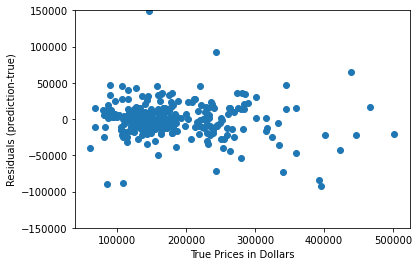

In [212]:
# Plotting True SalePrice vs Residuals:
residuals = y_pred_test-y_test
plt.scatter(y_test,residuals)
plt.xlabel("True Prices in Dollars")
plt.ylabel("Residuals (prediction-true)")
plt.ylim(-150000, 150000)

plt.show()

At the far edge, we can see that one house is predicted $120,000 too low, another one is $150,000 too low. The predicted price is too low. My model is underestimating the price of expensive homes. It’s underestimating by an average of say, 100000/$80000 etc. I can get an actual number to put in the sentence. I also want to look at the least expensive homes and see if model is over or underestimating those. On the lowest side, there’s a second cluster, where we can see it’s overestimating some prices. Whenever we see 
underestimation on one side, we can always guarantee there’s overestimating on the other. That’s the way linear regression works, it’s going to be balanced overall. 
A more useful Residual plot is, when we start to plot it against or relative to a particular feature. We can do a for loop to go over all the continuous features. 

What kind of pattern do we see here? 
It may not be a slope or a trend but it has a different shape.  an envelope that wraps up all the points. If I had to draw a line that gathers them all up, what shape will I come up with? A square/rectangle/diamond what kind of shape can one draw here? an ellipse or a diamond probably?  We see combination of downward and upward slopes. How would you Generalize: Looks pretty balanced on the top and bottom of zero. It’s not over or underestimating anywhere significantly. 
We can say that homes that have Lot Frontage at the edges, for bigger Lot Frontage houses (180 ft or over), we can say that the model predicts the prices more accurately (the residual seems to be on the 0 axis). For small Lot Frontage homes, on the far left (20 ft, etc), the residuals seem to be close to zero. For the 20, 35, 30 ft-ers if we draw a circle, we may find a mean rounding up close to zero. Therefore, we can say that Model’s doing a pretty good job estimating the small and large frontage areas. 
But what about the medium ones?  Let’s say, for the 100ft ones, it looks balanced, however, in terms of accuracy the spread of standard error or the magnitude of our error is larger. On average, the error will be larger. Any measure of error, say RMSE will be much larger for the models trying to predict homes between 60 and a 100 ft Lot Frontage. So, the model is doing poorly for homes with modest or medium sized Lot Frontage, but does will for homes with large or small frontage area. 
This plot does not give us any idea of what to do in order to improve our estimate of it. if we see a downslope, over estimation of inexpensive homes, a downward curve towards the far right, that tells an experienced DS that some of the feature variables need to be squared. It was hoped ‘LotFrontage’ would be one such feature, but it looks like, it doesn’t have a lot of curvature. But once we plot other feature variables against the residuals,  and if we ever see a u-shape or any upside down, that’s an opportunity to square them. 


No handles with labels found to put in legend.


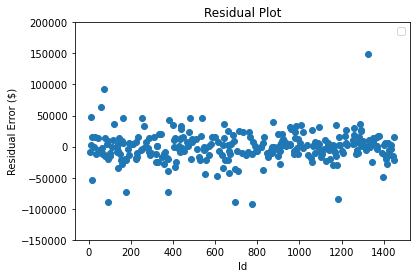

No handles with labels found to put in legend.


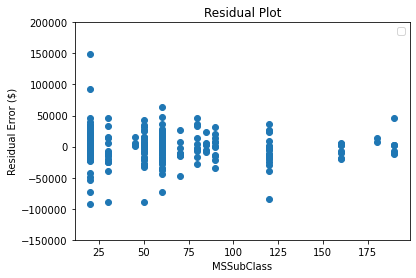

No handles with labels found to put in legend.


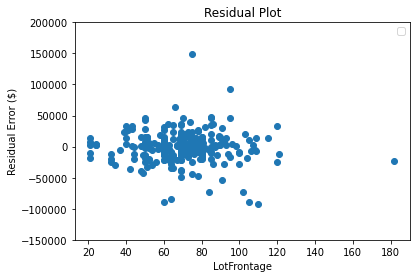

No handles with labels found to put in legend.


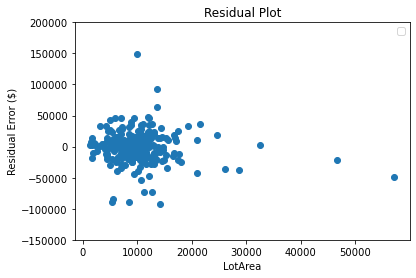

No handles with labels found to put in legend.


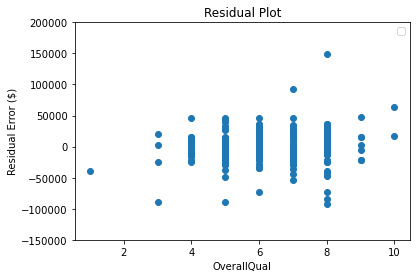

No handles with labels found to put in legend.


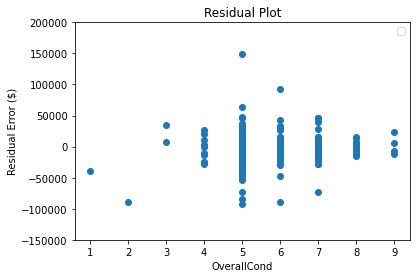

No handles with labels found to put in legend.


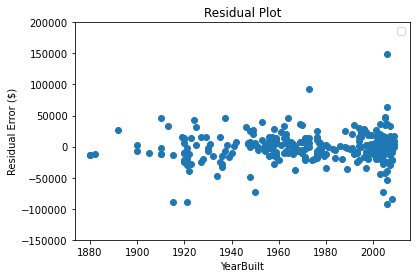

No handles with labels found to put in legend.


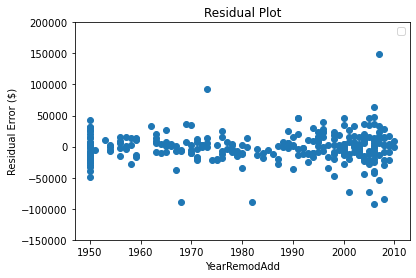

No handles with labels found to put in legend.


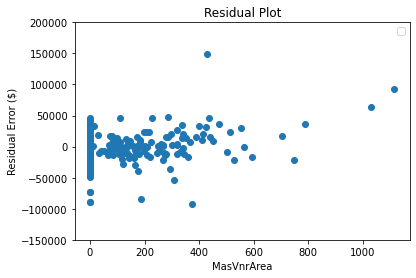

No handles with labels found to put in legend.


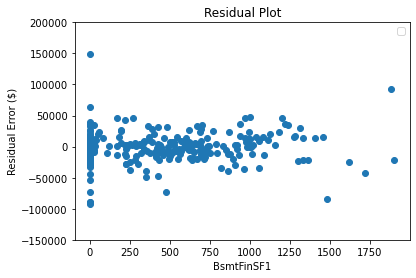

No handles with labels found to put in legend.


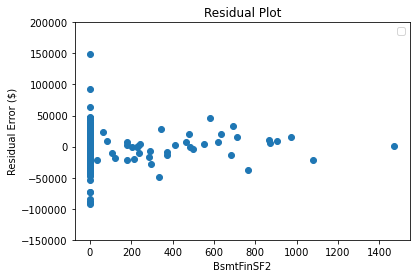

No handles with labels found to put in legend.


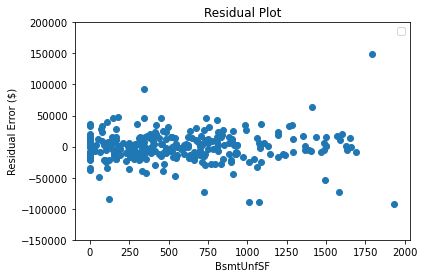

No handles with labels found to put in legend.


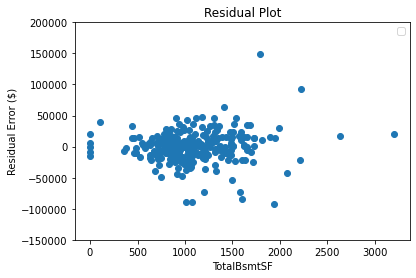

No handles with labels found to put in legend.


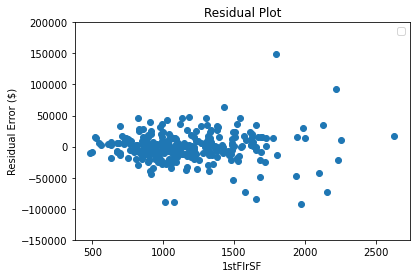

No handles with labels found to put in legend.


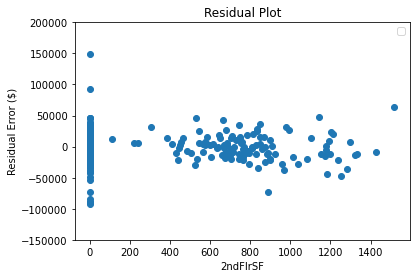

No handles with labels found to put in legend.


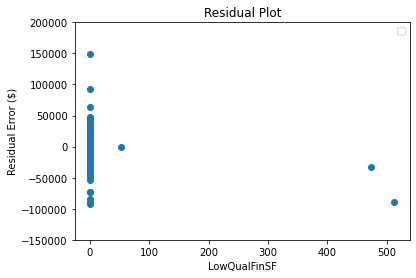

No handles with labels found to put in legend.


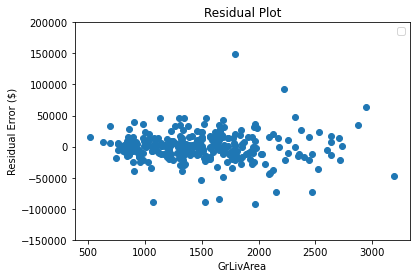

No handles with labels found to put in legend.


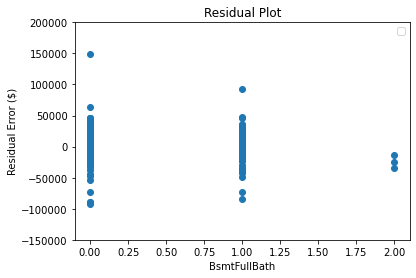

No handles with labels found to put in legend.


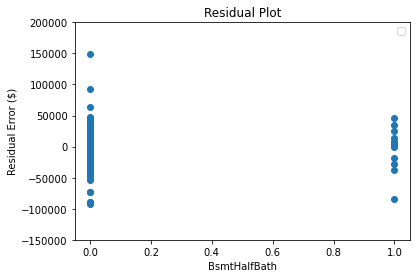

No handles with labels found to put in legend.


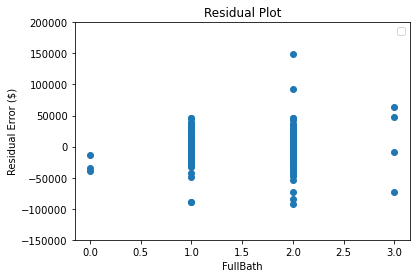

No handles with labels found to put in legend.


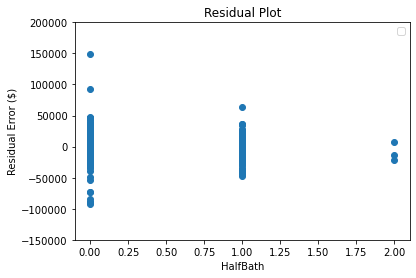

No handles with labels found to put in legend.


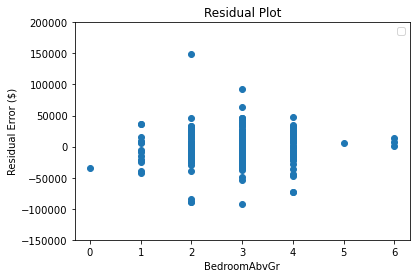

No handles with labels found to put in legend.


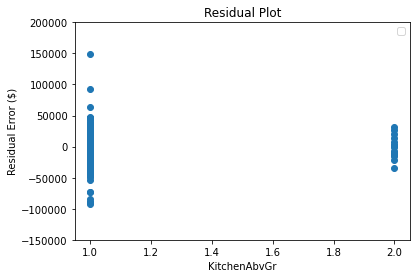

No handles with labels found to put in legend.


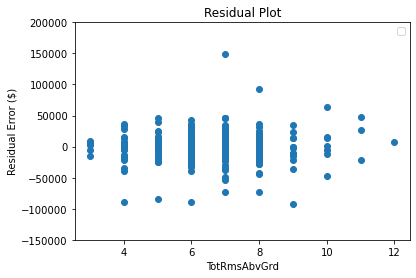

No handles with labels found to put in legend.


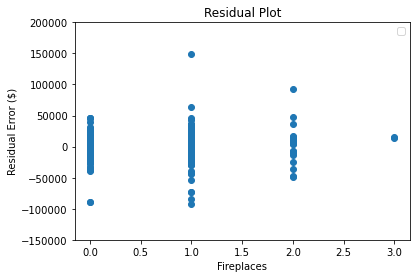

No handles with labels found to put in legend.


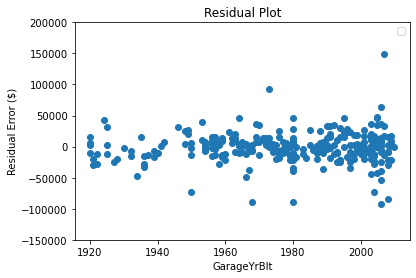

No handles with labels found to put in legend.


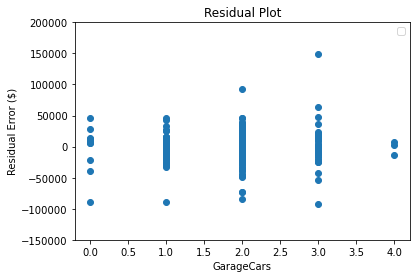

No handles with labels found to put in legend.


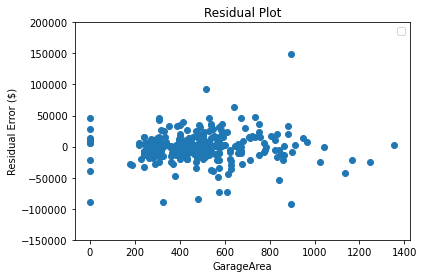

No handles with labels found to put in legend.


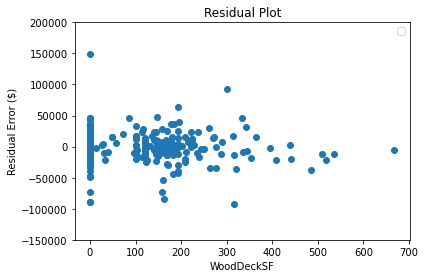

No handles with labels found to put in legend.


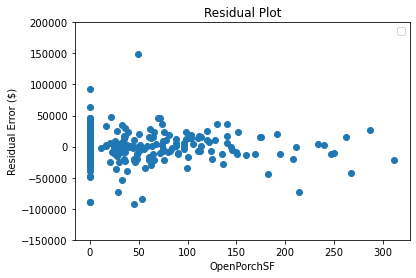

No handles with labels found to put in legend.


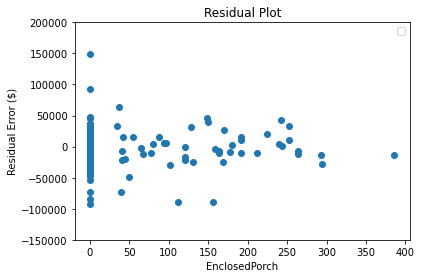

No handles with labels found to put in legend.


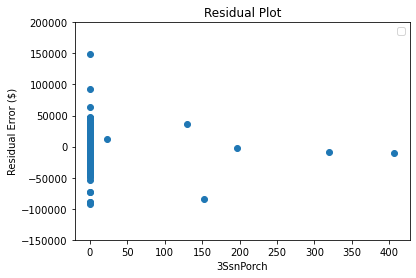

No handles with labels found to put in legend.


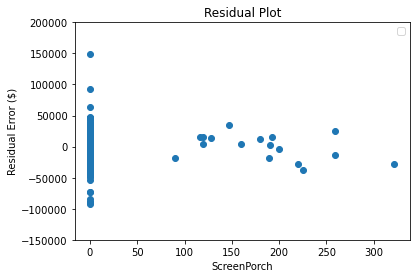

No handles with labels found to put in legend.


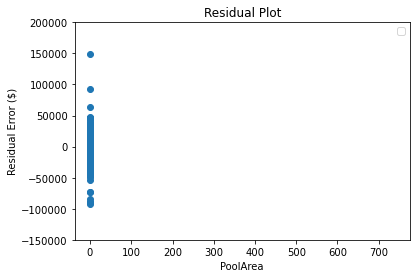

No handles with labels found to put in legend.


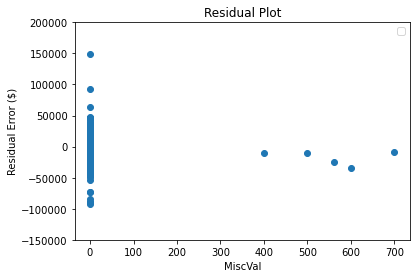

No handles with labels found to put in legend.


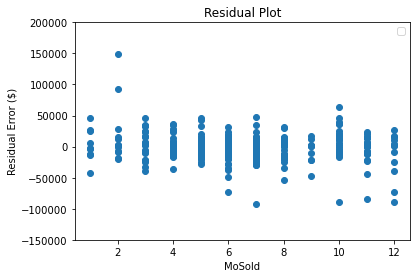

No handles with labels found to put in legend.


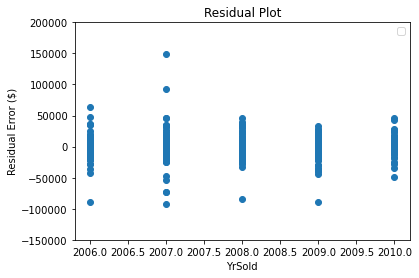

No handles with labels found to put in legend.


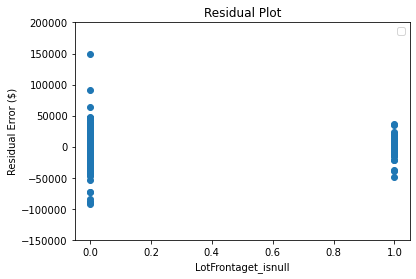

No handles with labels found to put in legend.


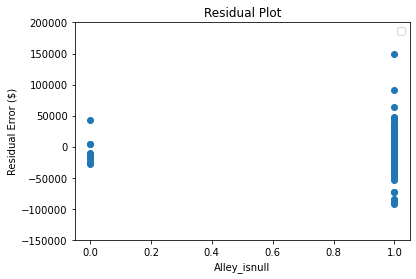

No handles with labels found to put in legend.


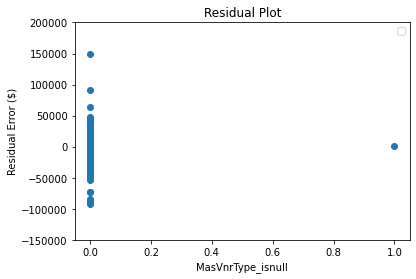

No handles with labels found to put in legend.


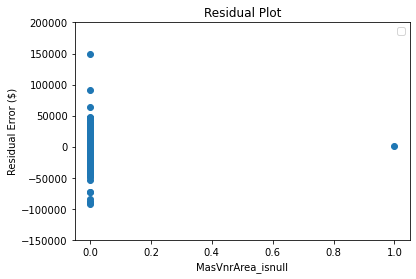

No handles with labels found to put in legend.


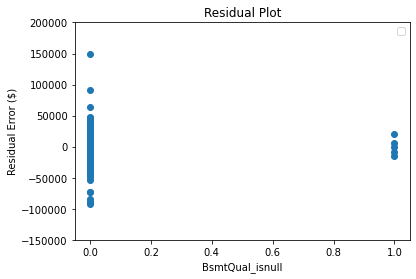

No handles with labels found to put in legend.


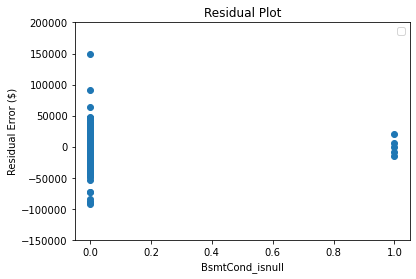

No handles with labels found to put in legend.


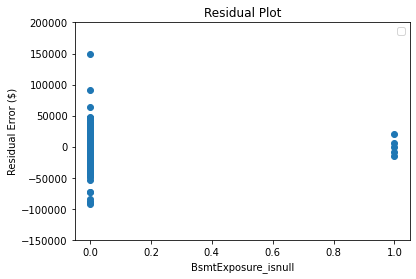

No handles with labels found to put in legend.


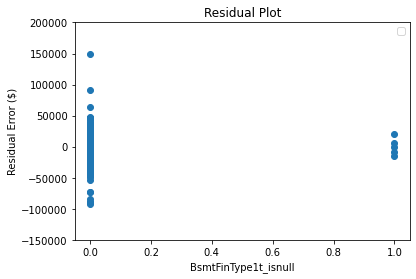

No handles with labels found to put in legend.


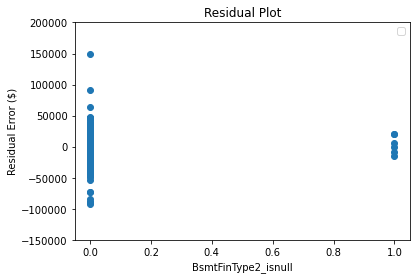

No handles with labels found to put in legend.


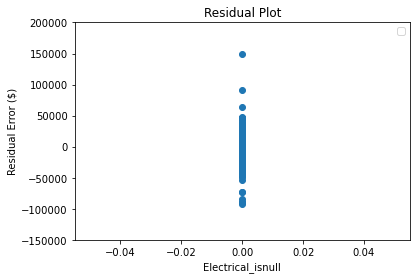

No handles with labels found to put in legend.


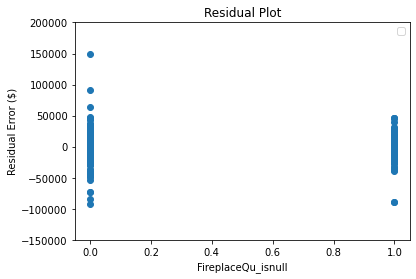

No handles with labels found to put in legend.


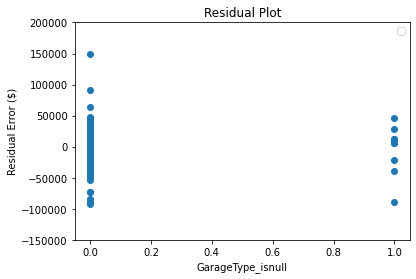

No handles with labels found to put in legend.


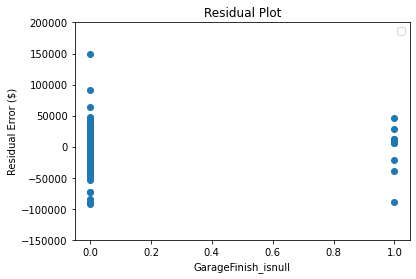

No handles with labels found to put in legend.


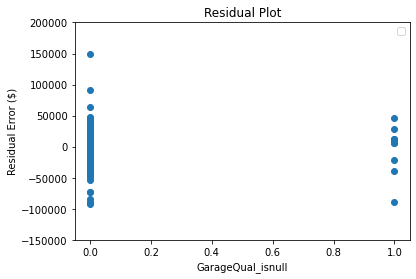

No handles with labels found to put in legend.


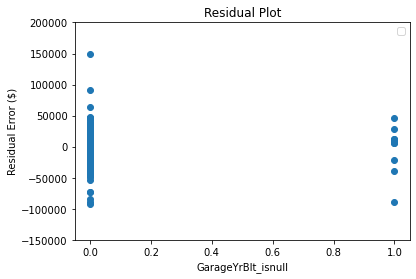

No handles with labels found to put in legend.


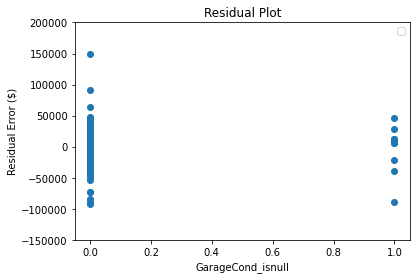

No handles with labels found to put in legend.


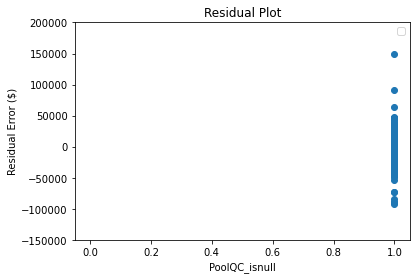

No handles with labels found to put in legend.


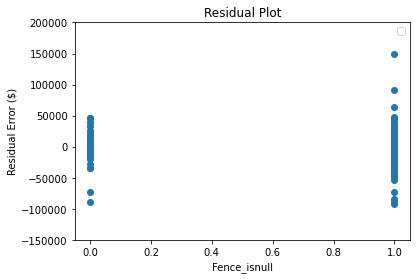

No handles with labels found to put in legend.


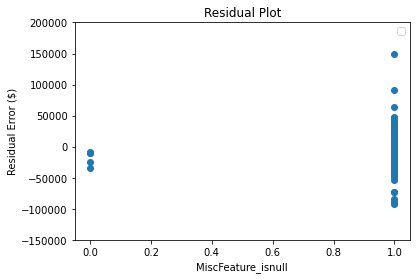

No handles with labels found to put in legend.


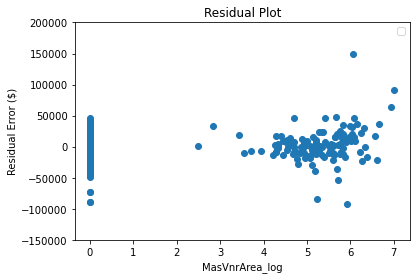

No handles with labels found to put in legend.


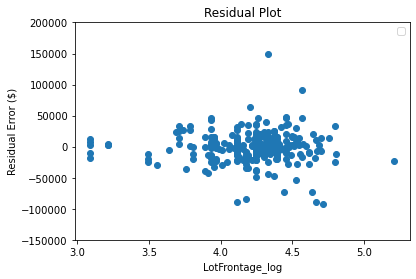

No handles with labels found to put in legend.


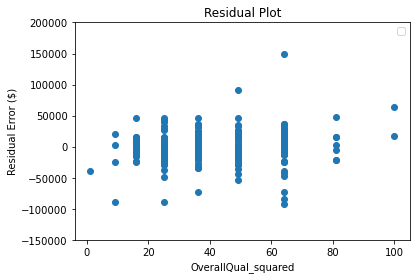

No handles with labels found to put in legend.


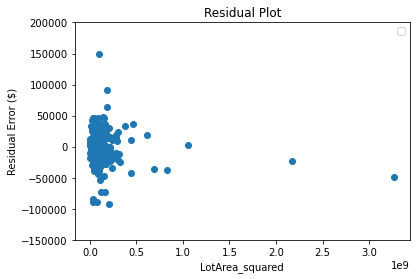

No handles with labels found to put in legend.


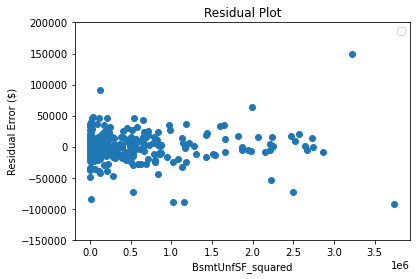

No handles with labels found to put in legend.


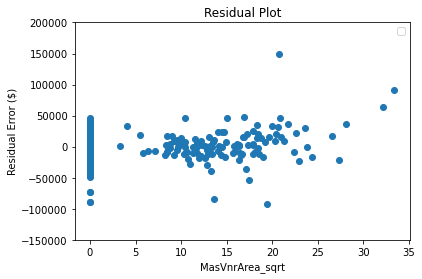

No handles with labels found to put in legend.


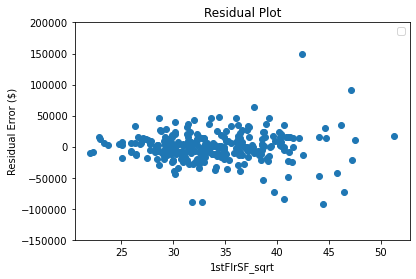

No handles with labels found to put in legend.


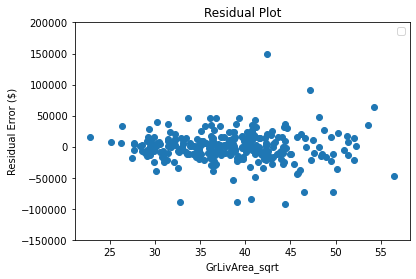

No handles with labels found to put in legend.


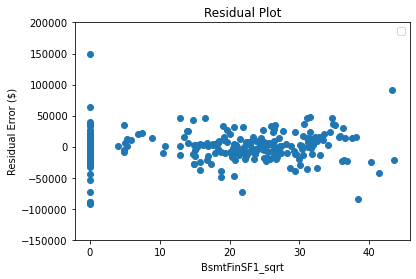

No handles with labels found to put in legend.


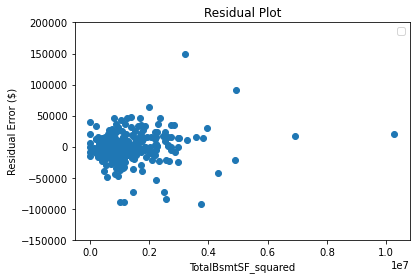

No handles with labels found to put in legend.


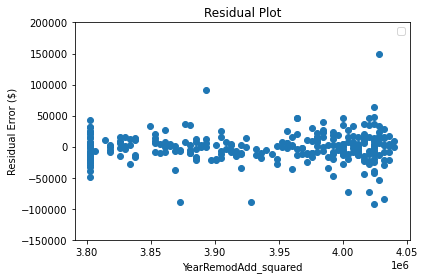

No handles with labels found to put in legend.


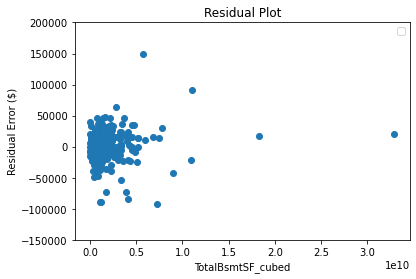

No handles with labels found to put in legend.


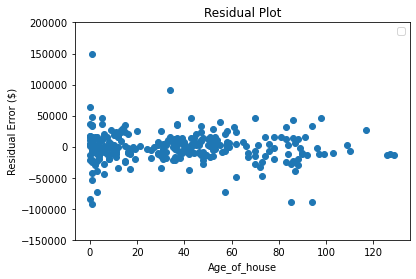

No handles with labels found to put in legend.


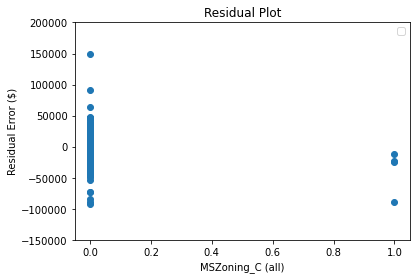

No handles with labels found to put in legend.


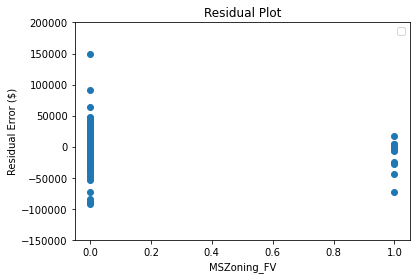

No handles with labels found to put in legend.


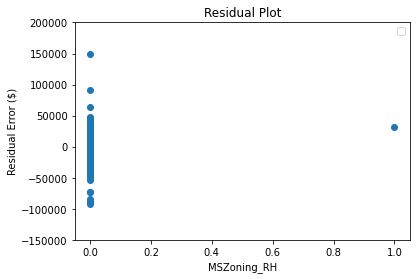

No handles with labels found to put in legend.


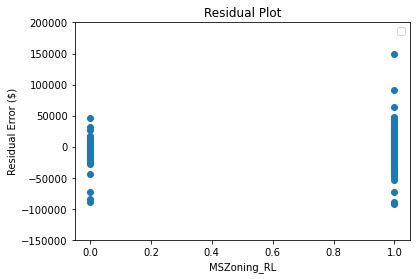

No handles with labels found to put in legend.


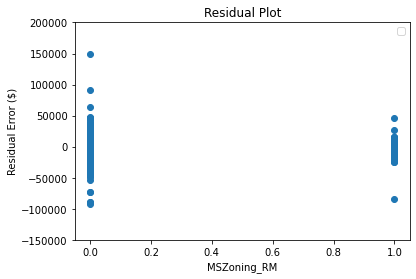

No handles with labels found to put in legend.


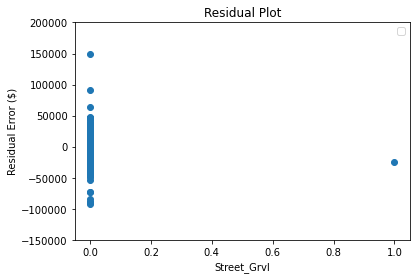

No handles with labels found to put in legend.


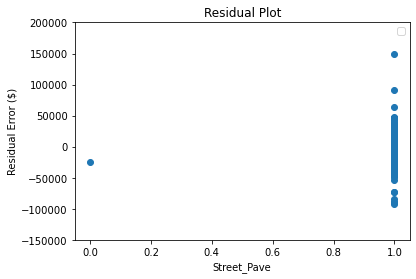

No handles with labels found to put in legend.


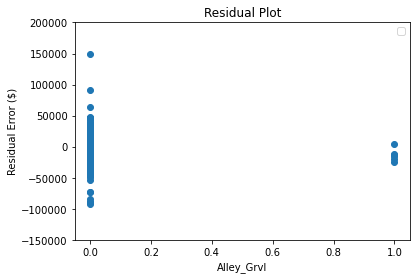

No handles with labels found to put in legend.


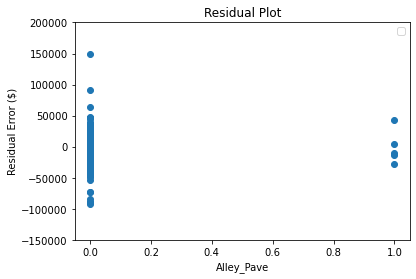

No handles with labels found to put in legend.


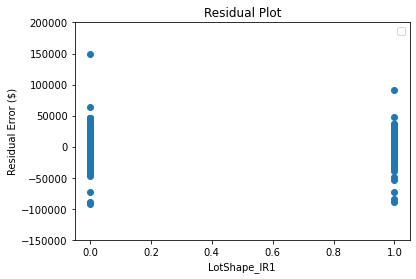

No handles with labels found to put in legend.


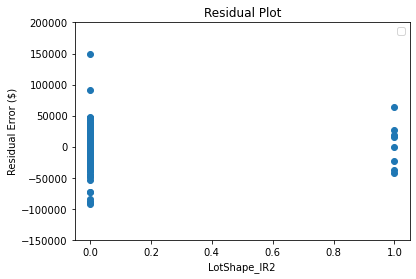

No handles with labels found to put in legend.


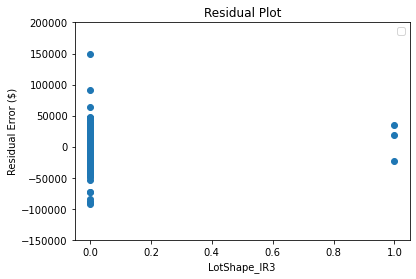

No handles with labels found to put in legend.


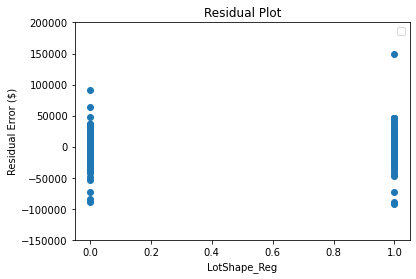

No handles with labels found to put in legend.


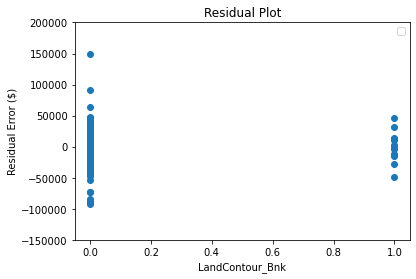

No handles with labels found to put in legend.


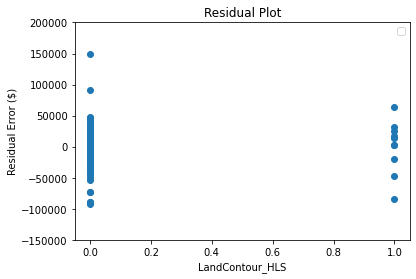

No handles with labels found to put in legend.


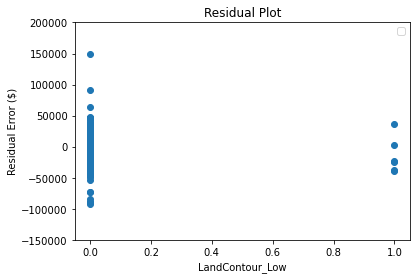

No handles with labels found to put in legend.


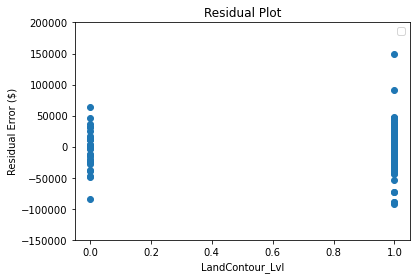

No handles with labels found to put in legend.


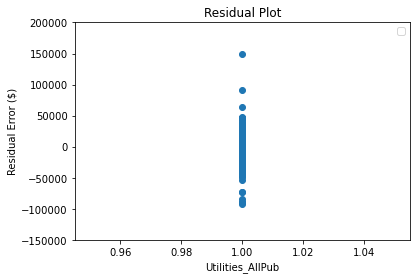

No handles with labels found to put in legend.


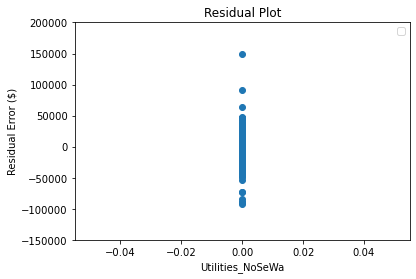

No handles with labels found to put in legend.


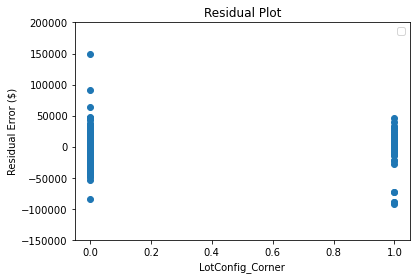

No handles with labels found to put in legend.


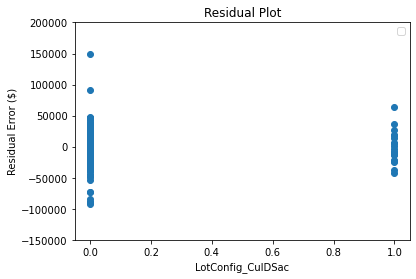

No handles with labels found to put in legend.


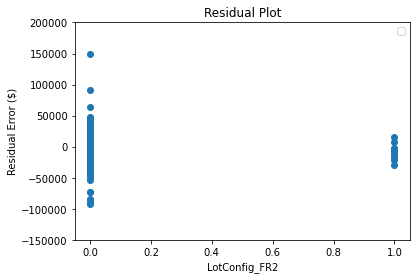

No handles with labels found to put in legend.


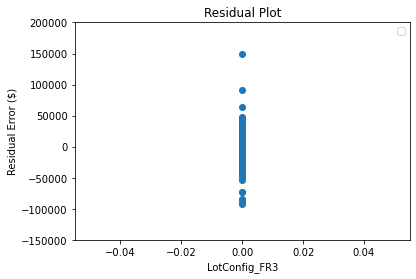

No handles with labels found to put in legend.


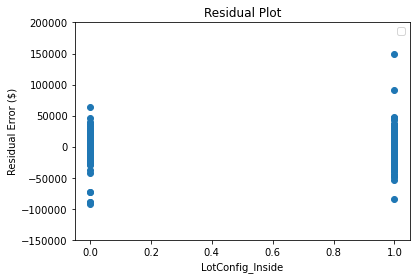

No handles with labels found to put in legend.


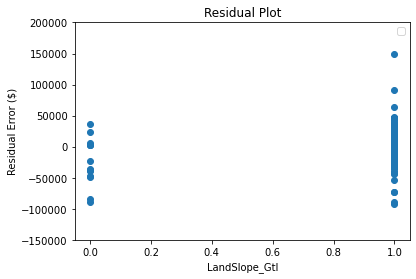

No handles with labels found to put in legend.


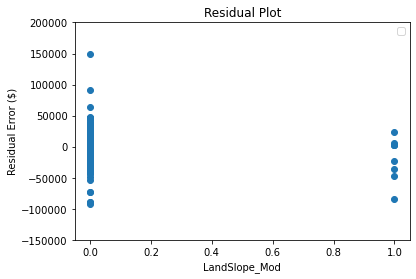

No handles with labels found to put in legend.


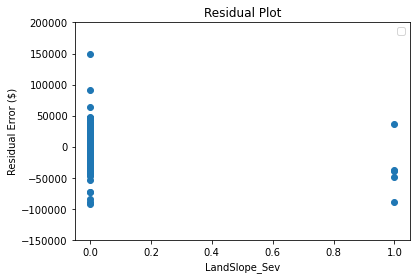

No handles with labels found to put in legend.


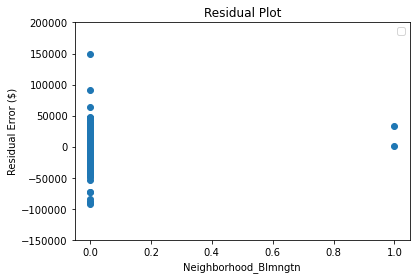

No handles with labels found to put in legend.


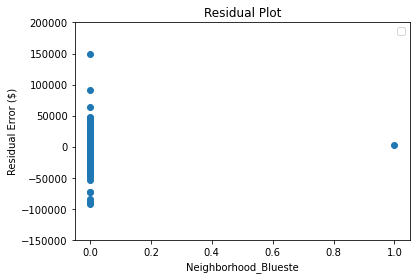

No handles with labels found to put in legend.


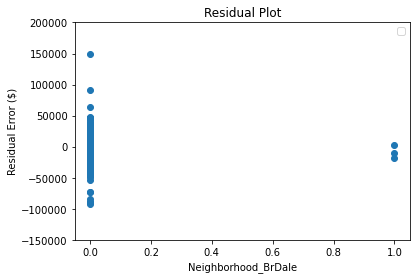

No handles with labels found to put in legend.


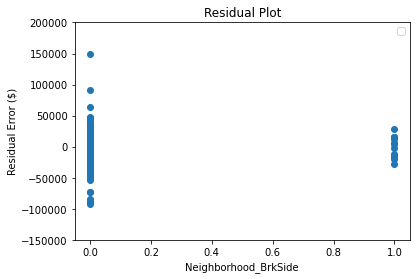

No handles with labels found to put in legend.


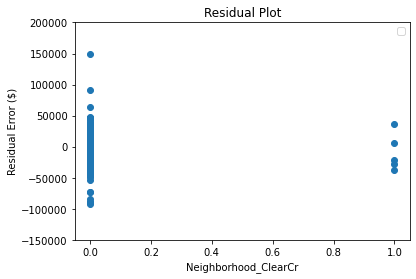

No handles with labels found to put in legend.


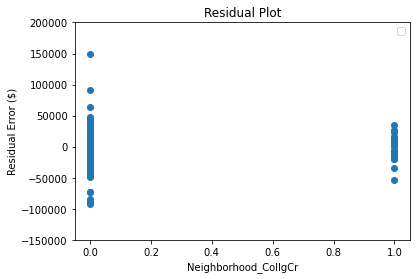

No handles with labels found to put in legend.


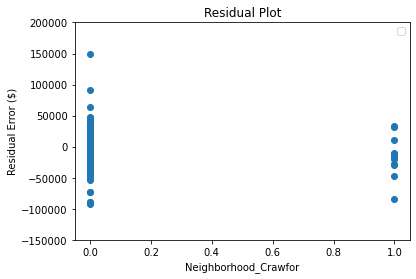

No handles with labels found to put in legend.


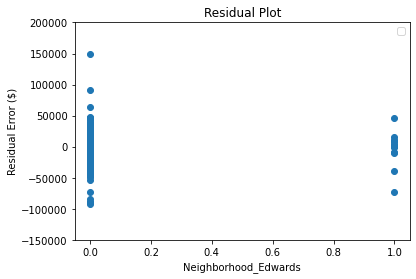

No handles with labels found to put in legend.


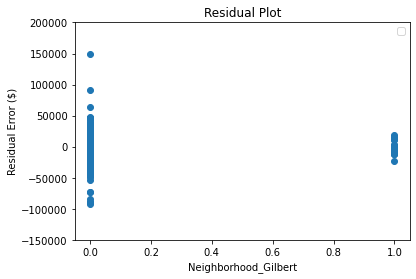

No handles with labels found to put in legend.


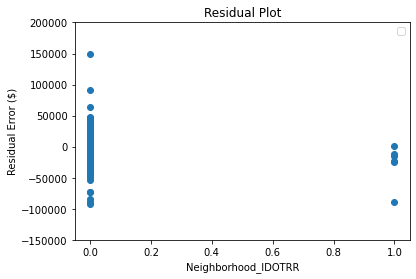

No handles with labels found to put in legend.


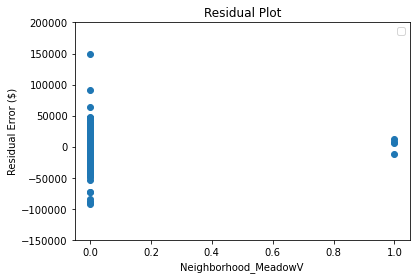

No handles with labels found to put in legend.


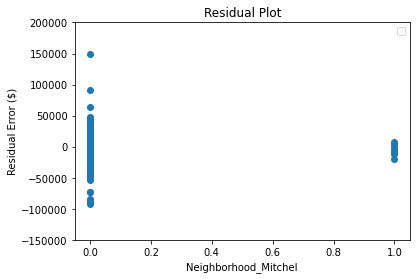

No handles with labels found to put in legend.


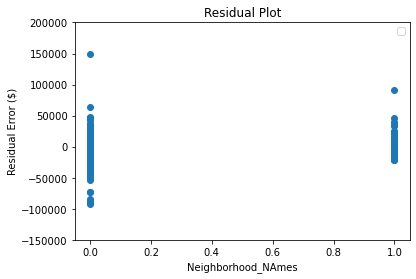

No handles with labels found to put in legend.


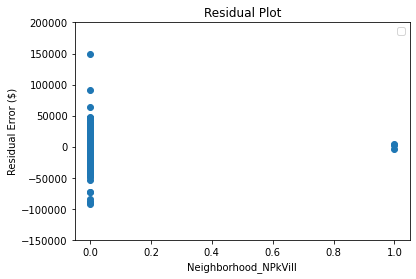

No handles with labels found to put in legend.


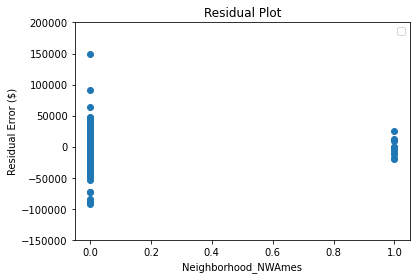

No handles with labels found to put in legend.


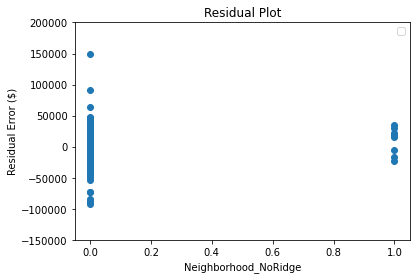

No handles with labels found to put in legend.


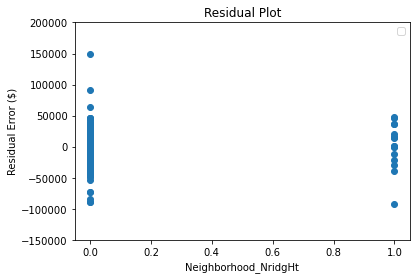

No handles with labels found to put in legend.


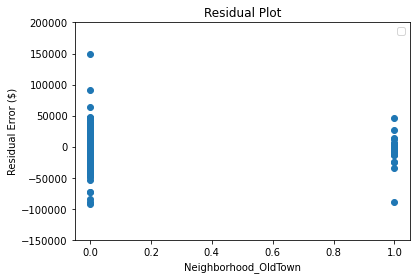

No handles with labels found to put in legend.


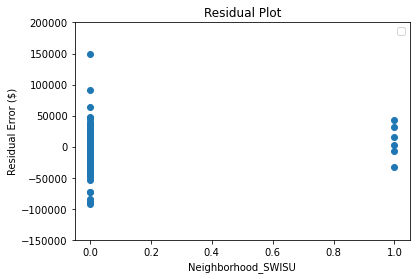

No handles with labels found to put in legend.


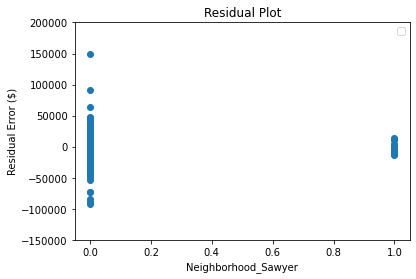

No handles with labels found to put in legend.


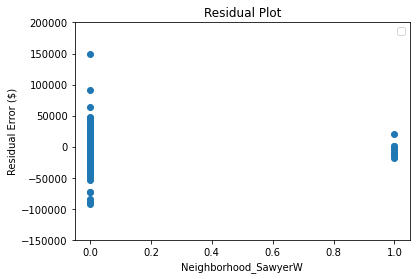

No handles with labels found to put in legend.


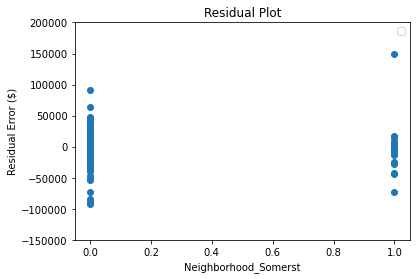

No handles with labels found to put in legend.


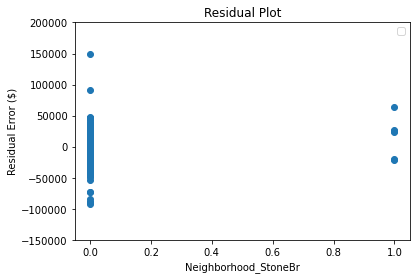

No handles with labels found to put in legend.


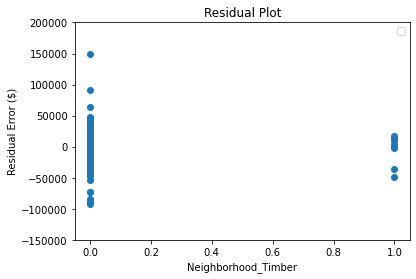

No handles with labels found to put in legend.


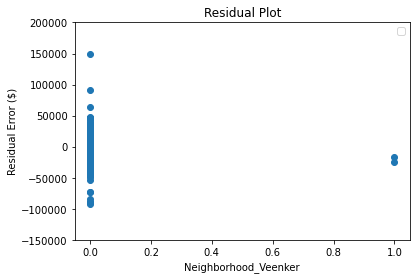

No handles with labels found to put in legend.


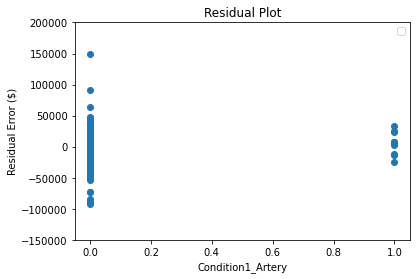

No handles with labels found to put in legend.


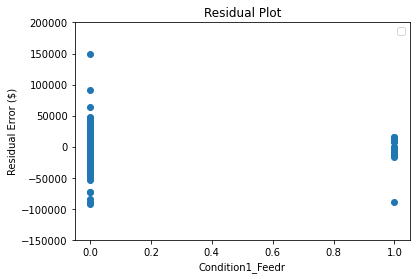

No handles with labels found to put in legend.


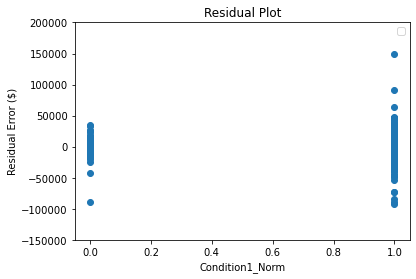

No handles with labels found to put in legend.


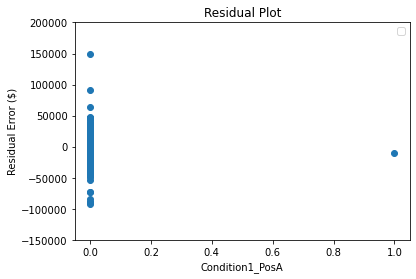

No handles with labels found to put in legend.


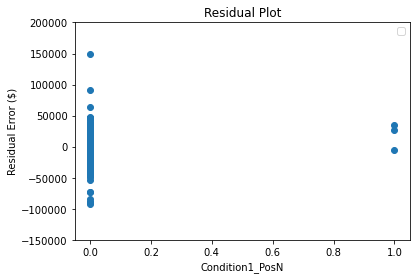

No handles with labels found to put in legend.


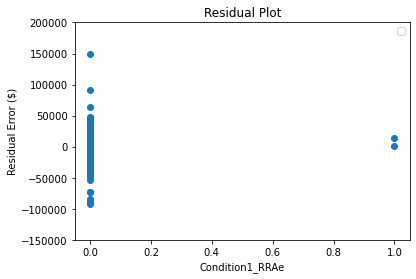

No handles with labels found to put in legend.


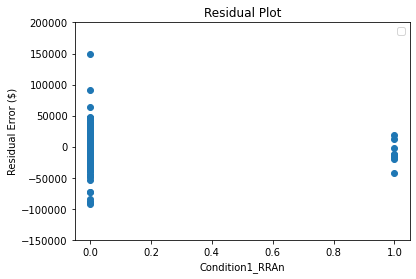

No handles with labels found to put in legend.


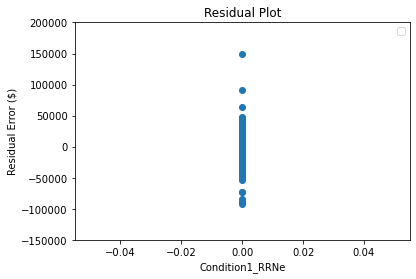

No handles with labels found to put in legend.


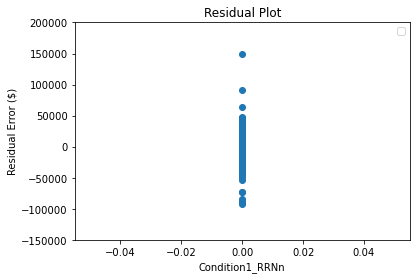

No handles with labels found to put in legend.


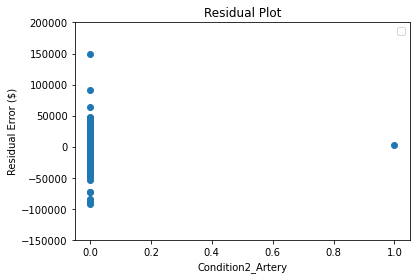

No handles with labels found to put in legend.


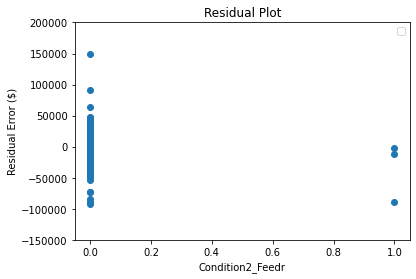

No handles with labels found to put in legend.


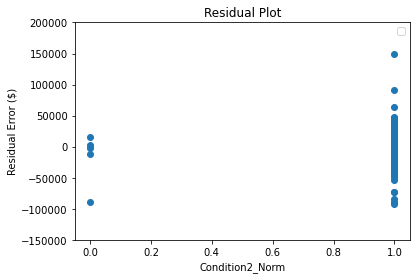

No handles with labels found to put in legend.


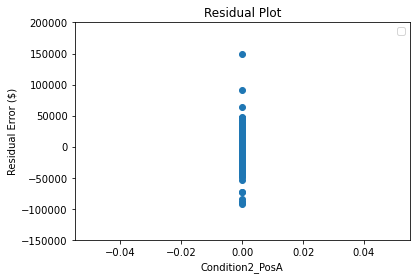

No handles with labels found to put in legend.


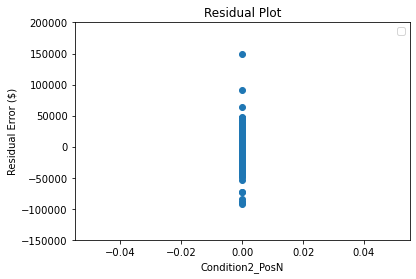

No handles with labels found to put in legend.


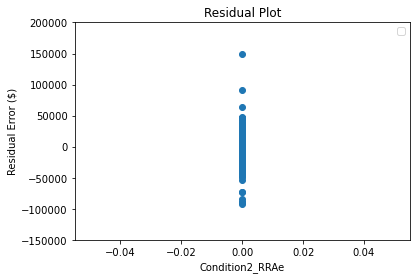

No handles with labels found to put in legend.


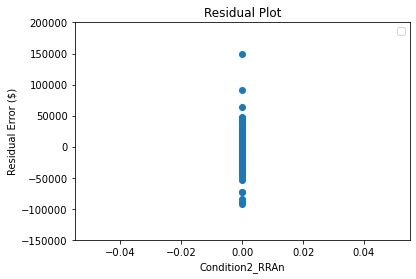

No handles with labels found to put in legend.


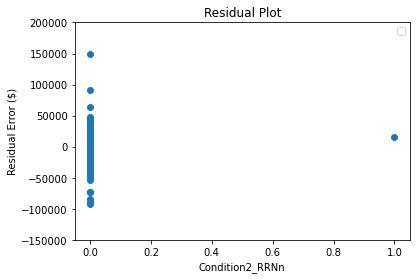

No handles with labels found to put in legend.


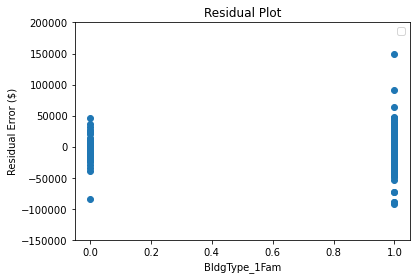

No handles with labels found to put in legend.


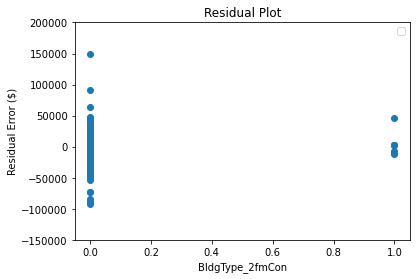

No handles with labels found to put in legend.


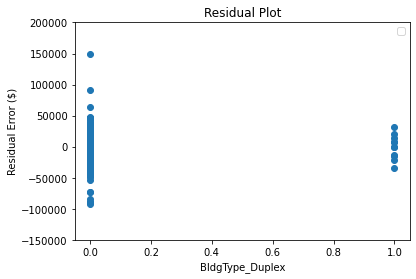

No handles with labels found to put in legend.


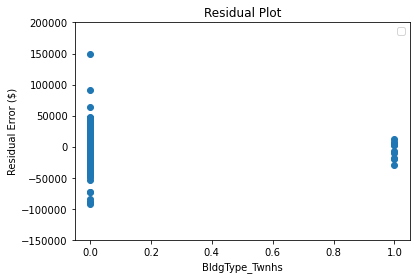

No handles with labels found to put in legend.


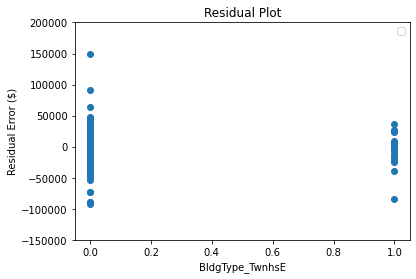

No handles with labels found to put in legend.


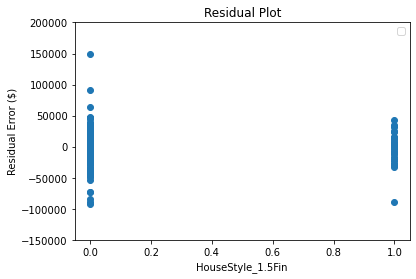

No handles with labels found to put in legend.


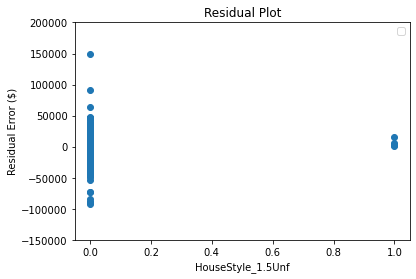

No handles with labels found to put in legend.


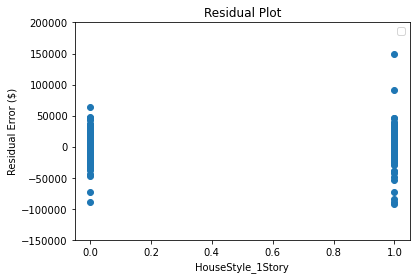

No handles with labels found to put in legend.


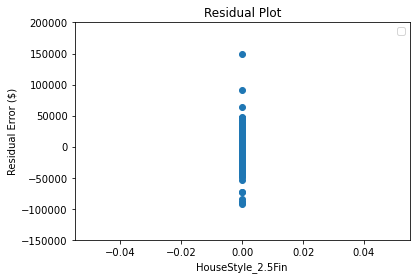

No handles with labels found to put in legend.


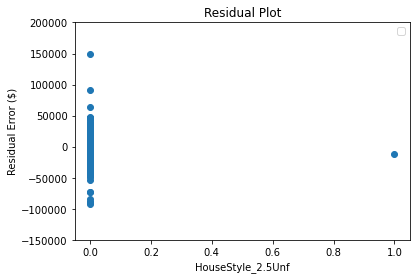

No handles with labels found to put in legend.


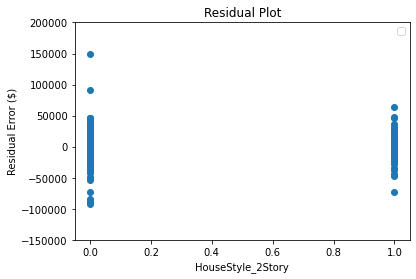

No handles with labels found to put in legend.


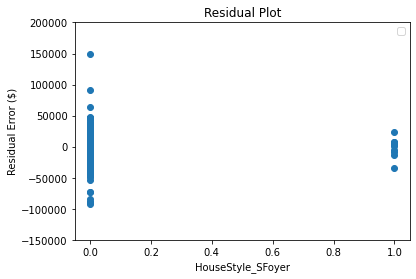

No handles with labels found to put in legend.


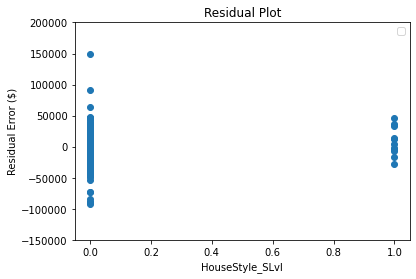

No handles with labels found to put in legend.


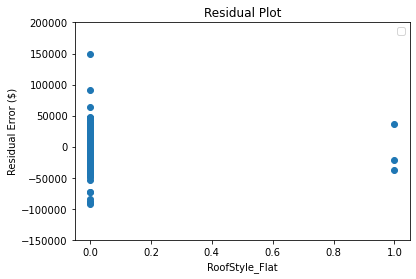

No handles with labels found to put in legend.


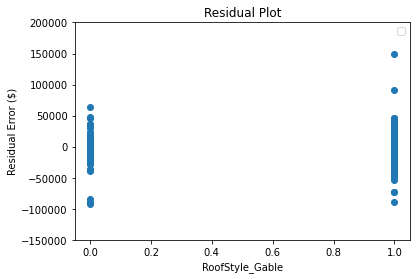

No handles with labels found to put in legend.


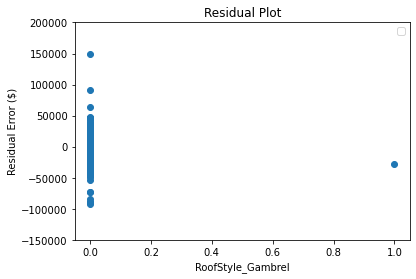

No handles with labels found to put in legend.


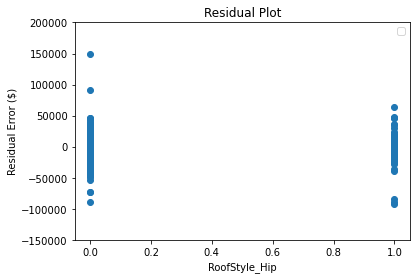

No handles with labels found to put in legend.


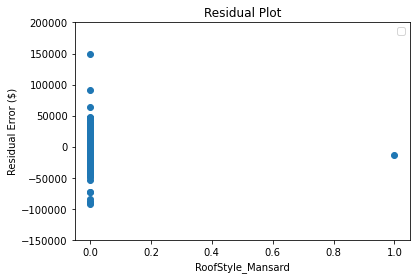

No handles with labels found to put in legend.


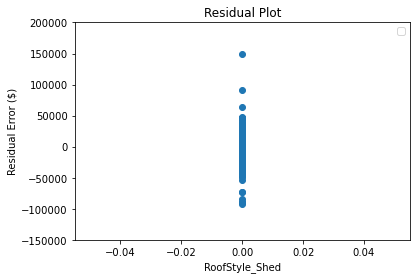

No handles with labels found to put in legend.


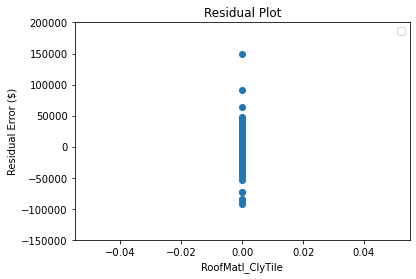

No handles with labels found to put in legend.


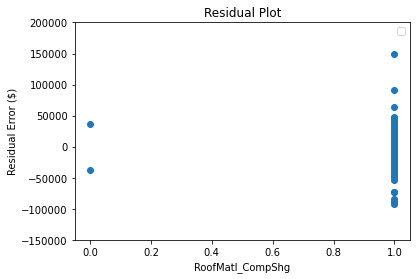

No handles with labels found to put in legend.


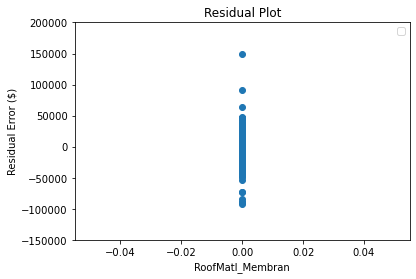

No handles with labels found to put in legend.


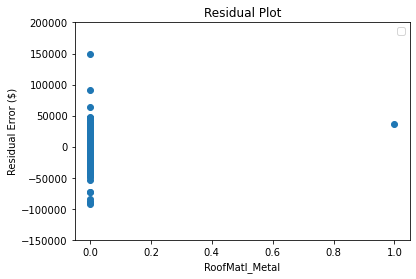

No handles with labels found to put in legend.


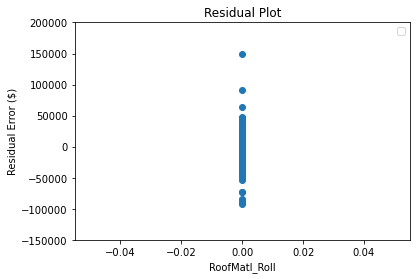

No handles with labels found to put in legend.


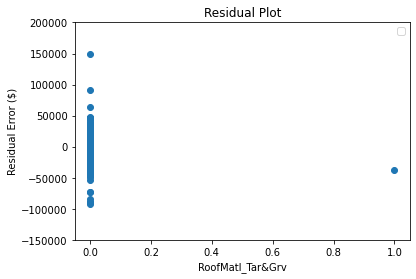

No handles with labels found to put in legend.


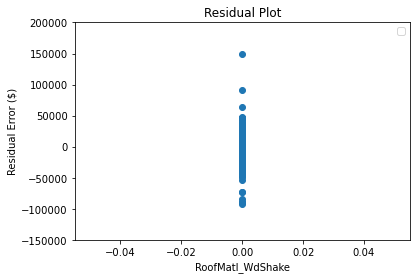

No handles with labels found to put in legend.


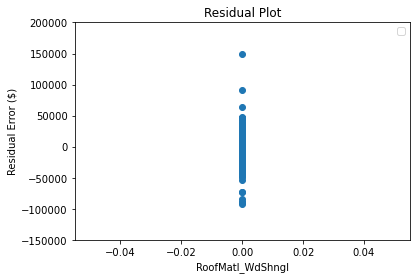

No handles with labels found to put in legend.


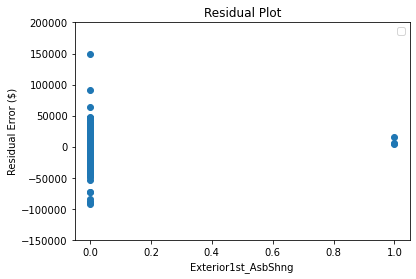

No handles with labels found to put in legend.


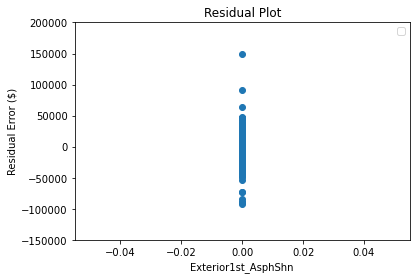

No handles with labels found to put in legend.


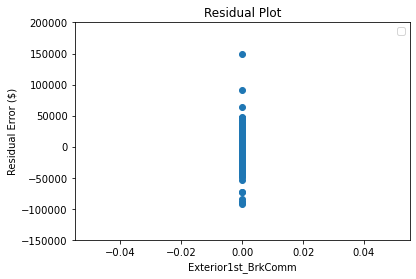

No handles with labels found to put in legend.


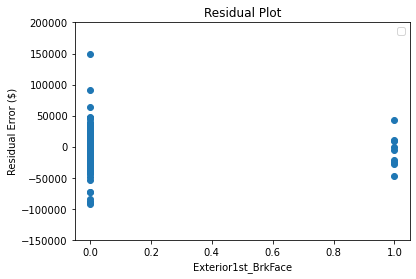

No handles with labels found to put in legend.


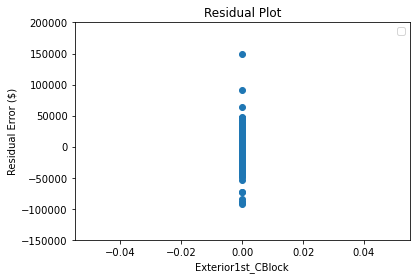

No handles with labels found to put in legend.


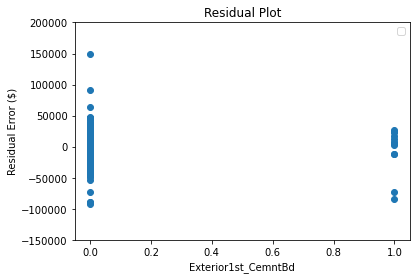

No handles with labels found to put in legend.


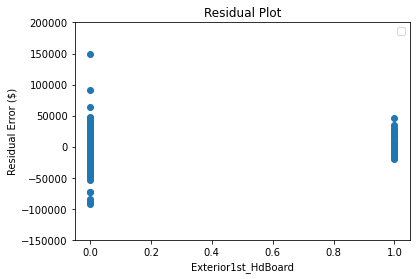

No handles with labels found to put in legend.


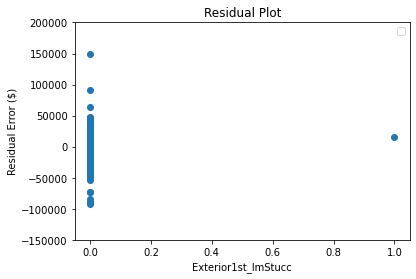

No handles with labels found to put in legend.


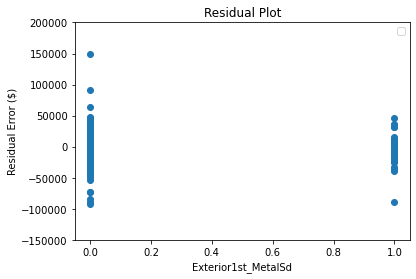

No handles with labels found to put in legend.


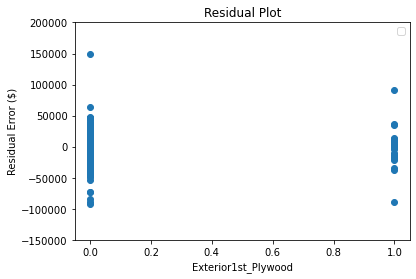

No handles with labels found to put in legend.


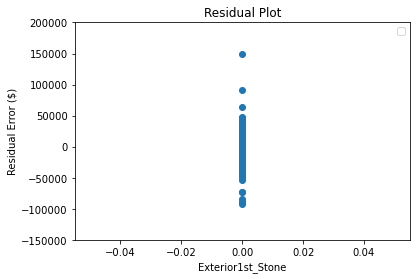

No handles with labels found to put in legend.


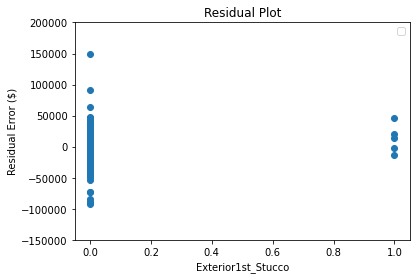

No handles with labels found to put in legend.


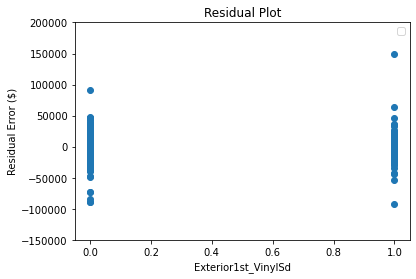

No handles with labels found to put in legend.


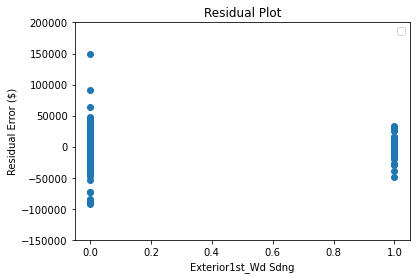

No handles with labels found to put in legend.


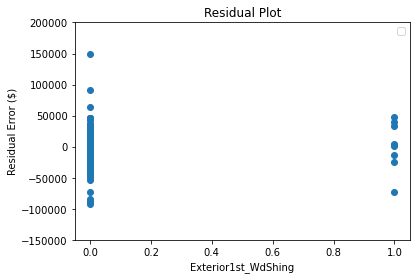

No handles with labels found to put in legend.


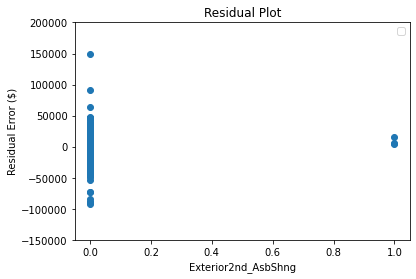

No handles with labels found to put in legend.


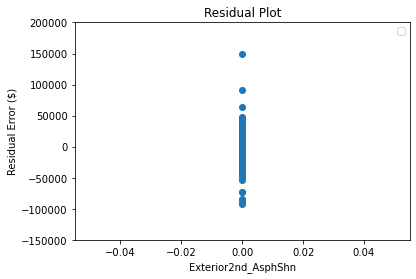

No handles with labels found to put in legend.


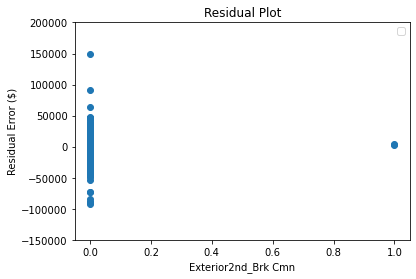

No handles with labels found to put in legend.


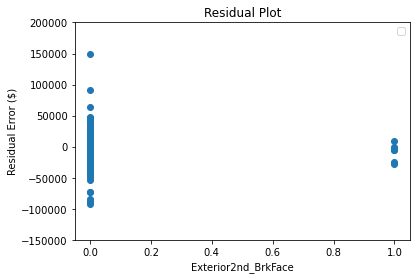

No handles with labels found to put in legend.


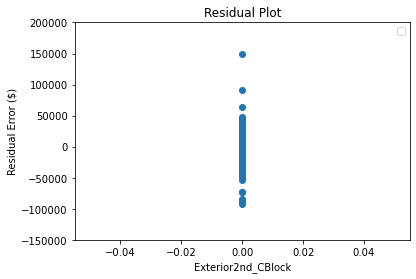

No handles with labels found to put in legend.


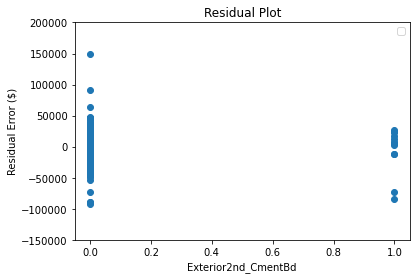

No handles with labels found to put in legend.


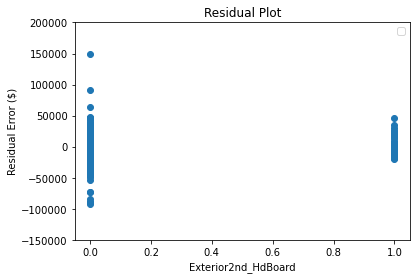

No handles with labels found to put in legend.


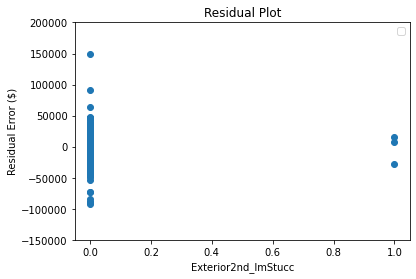

No handles with labels found to put in legend.


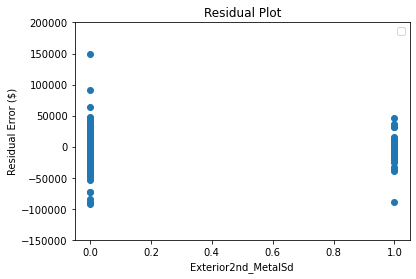

No handles with labels found to put in legend.


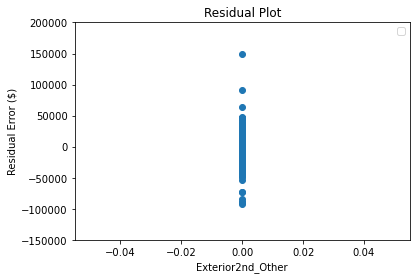

No handles with labels found to put in legend.


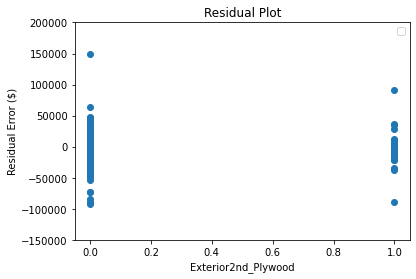

No handles with labels found to put in legend.


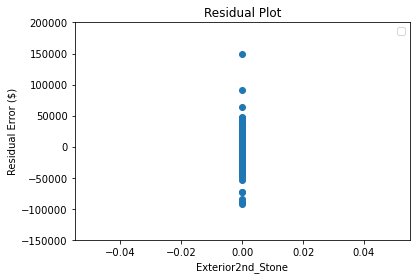

No handles with labels found to put in legend.


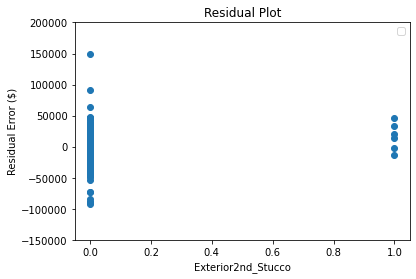

No handles with labels found to put in legend.


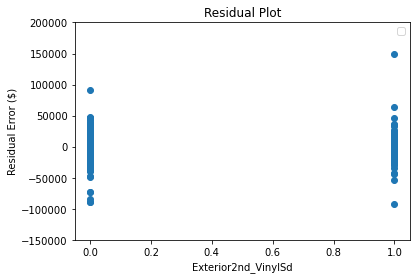

No handles with labels found to put in legend.


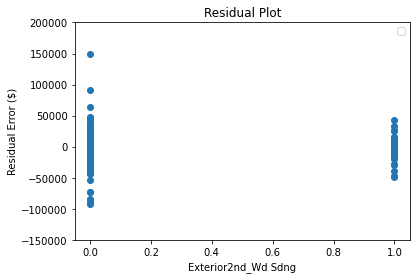

No handles with labels found to put in legend.


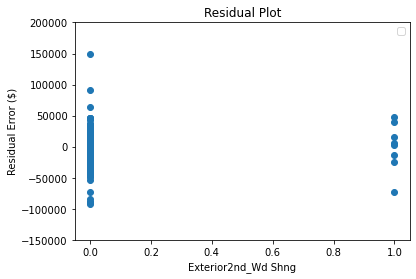

No handles with labels found to put in legend.


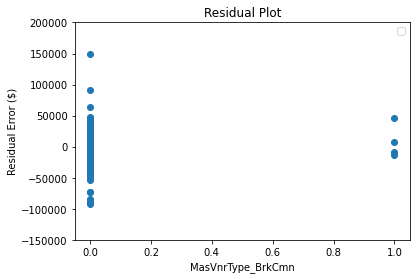

No handles with labels found to put in legend.


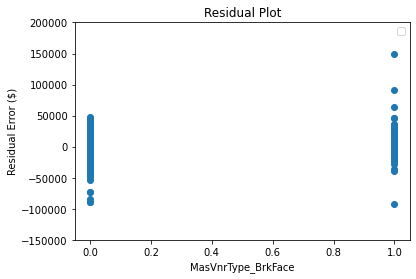

No handles with labels found to put in legend.


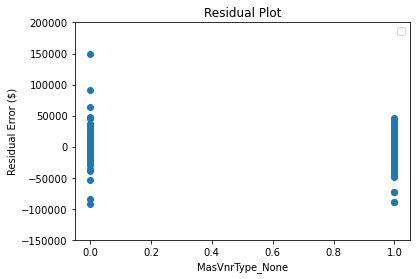

No handles with labels found to put in legend.


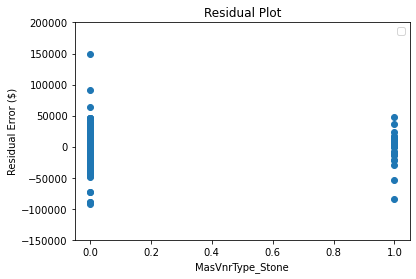

No handles with labels found to put in legend.


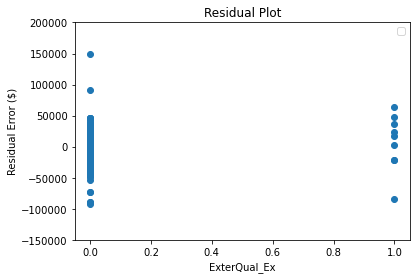

No handles with labels found to put in legend.


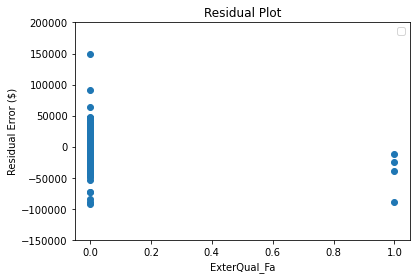

No handles with labels found to put in legend.


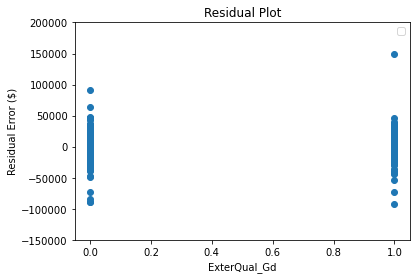

No handles with labels found to put in legend.


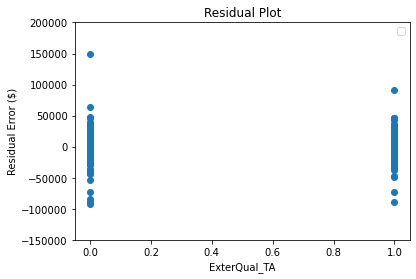

No handles with labels found to put in legend.


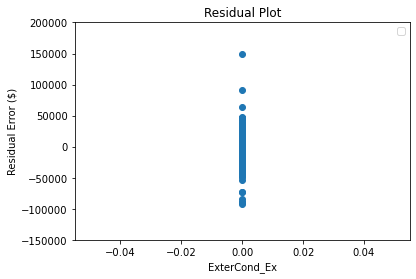

No handles with labels found to put in legend.


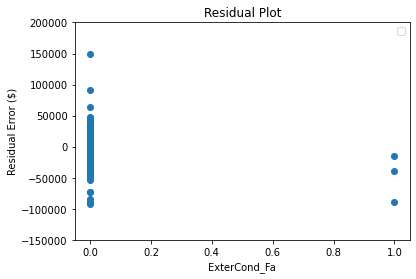

No handles with labels found to put in legend.


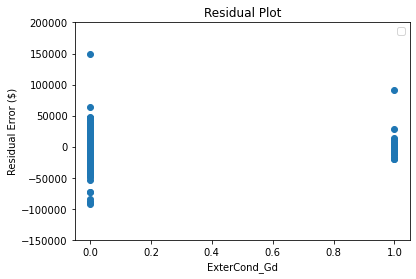

No handles with labels found to put in legend.


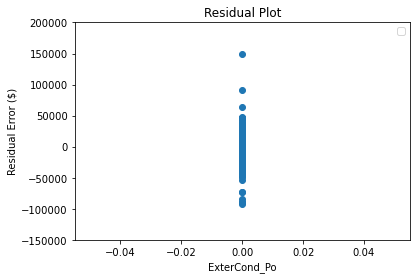

No handles with labels found to put in legend.


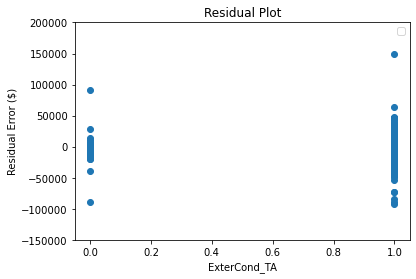

No handles with labels found to put in legend.


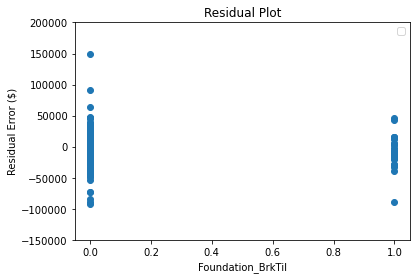

No handles with labels found to put in legend.


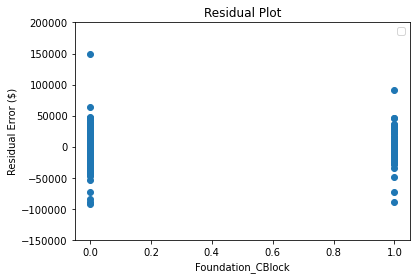

No handles with labels found to put in legend.


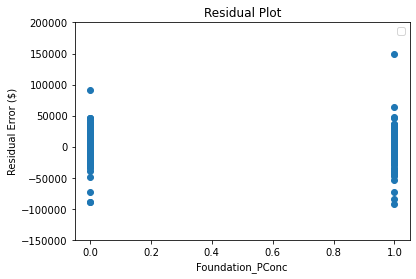

No handles with labels found to put in legend.


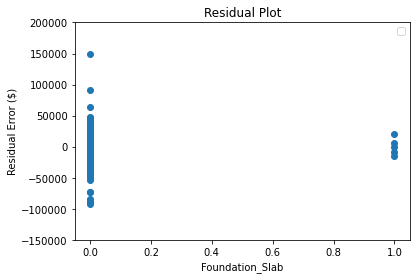

No handles with labels found to put in legend.


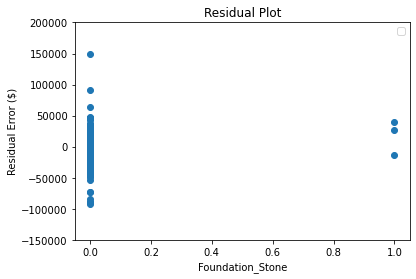

No handles with labels found to put in legend.


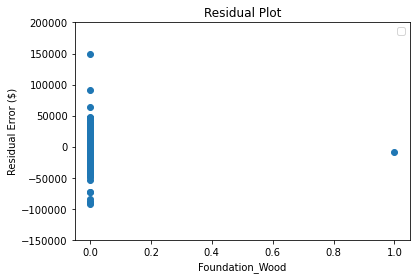

No handles with labels found to put in legend.


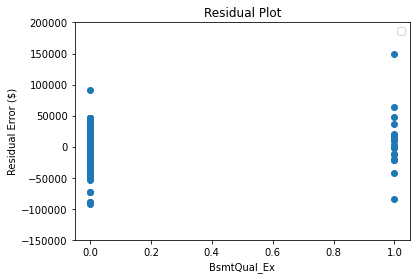

No handles with labels found to put in legend.


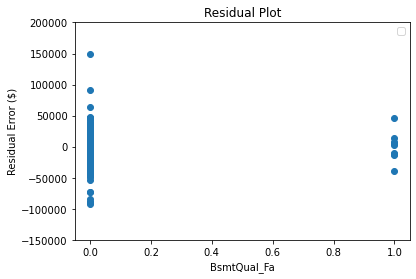

No handles with labels found to put in legend.


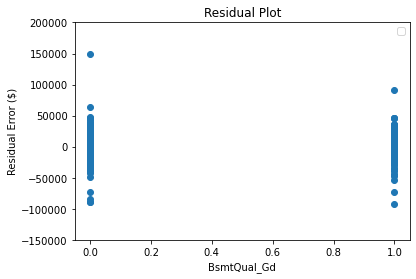

No handles with labels found to put in legend.


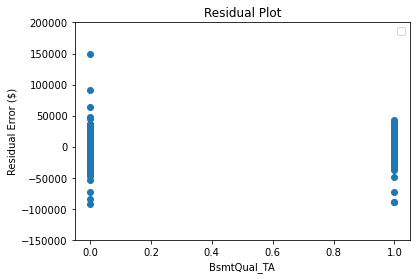

No handles with labels found to put in legend.


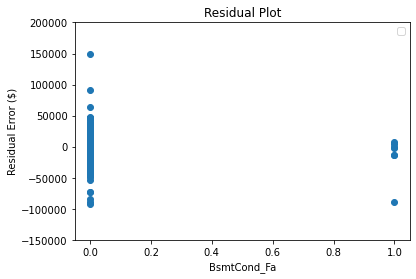

No handles with labels found to put in legend.


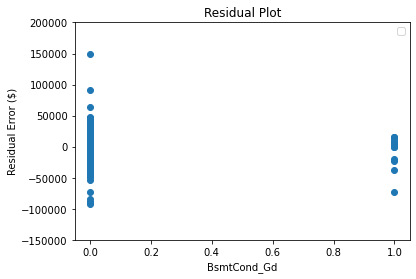

No handles with labels found to put in legend.


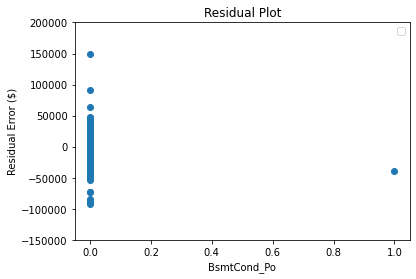

No handles with labels found to put in legend.


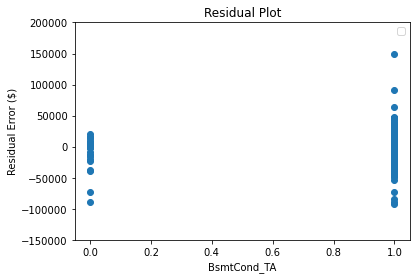

No handles with labels found to put in legend.


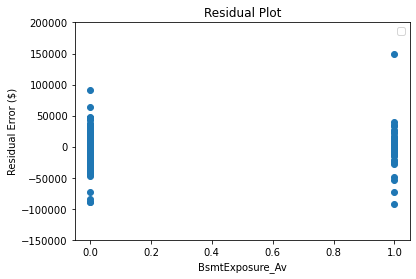

No handles with labels found to put in legend.


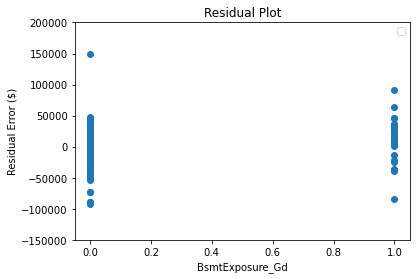

No handles with labels found to put in legend.


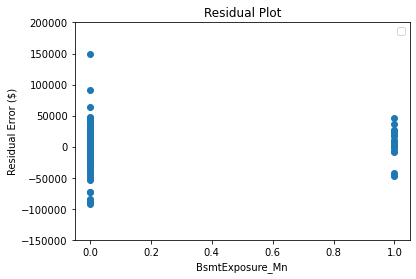

No handles with labels found to put in legend.


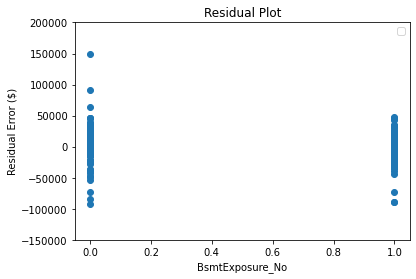

No handles with labels found to put in legend.


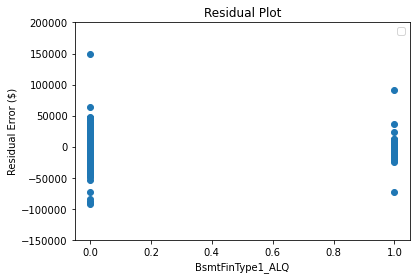

No handles with labels found to put in legend.


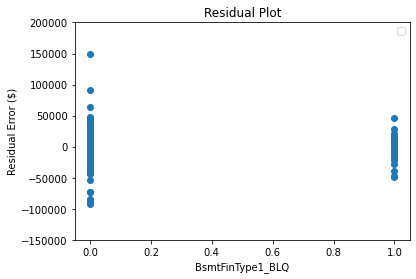

No handles with labels found to put in legend.


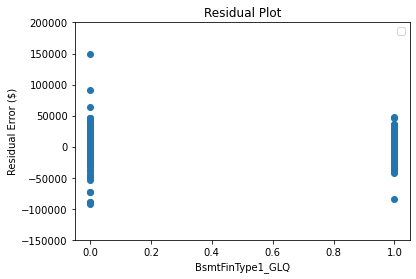

No handles with labels found to put in legend.


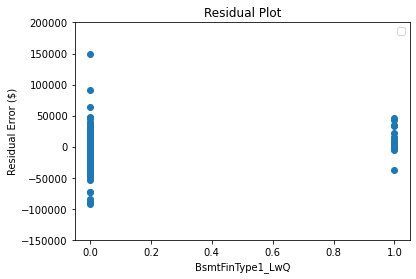

No handles with labels found to put in legend.


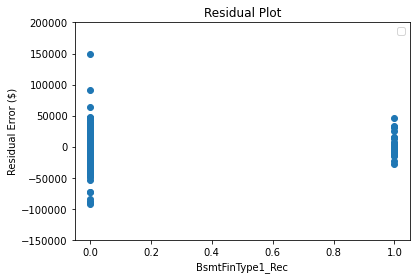

No handles with labels found to put in legend.


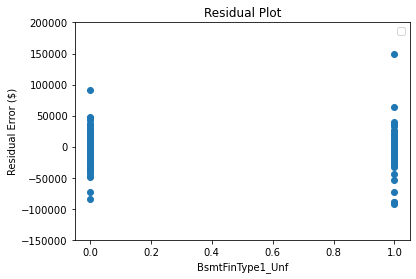

No handles with labels found to put in legend.


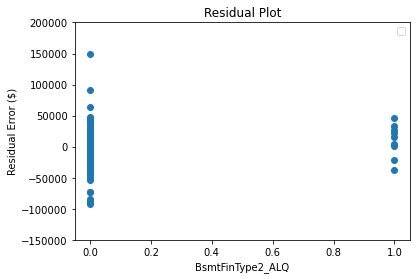

No handles with labels found to put in legend.


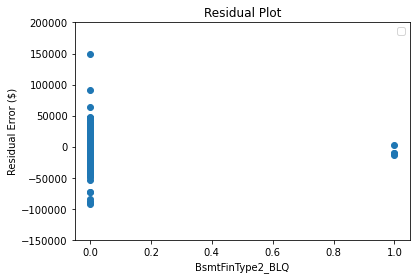

No handles with labels found to put in legend.


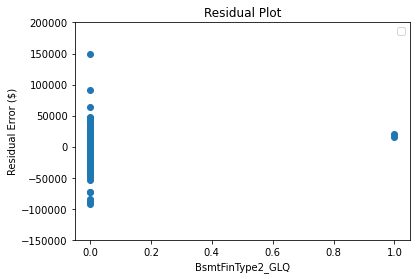

No handles with labels found to put in legend.


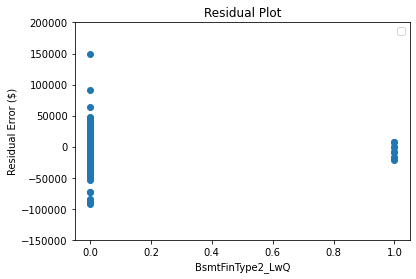

No handles with labels found to put in legend.


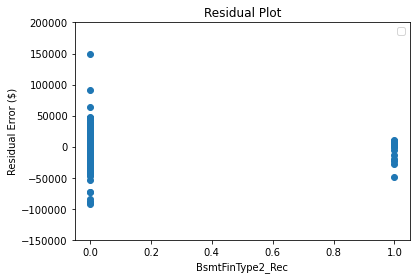

No handles with labels found to put in legend.


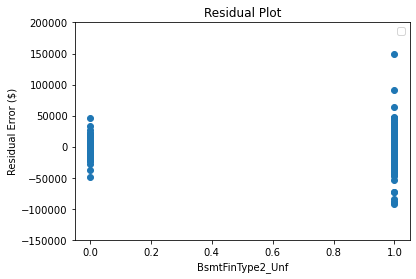

No handles with labels found to put in legend.


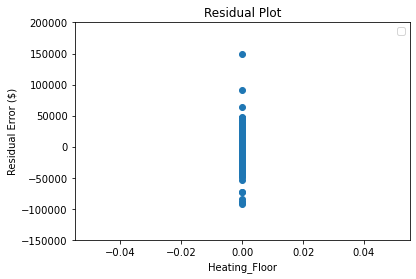

No handles with labels found to put in legend.


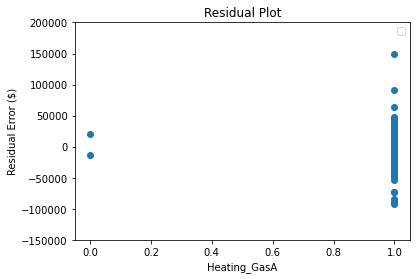

No handles with labels found to put in legend.


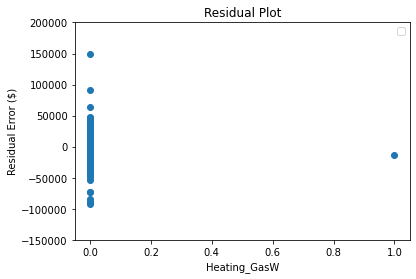

No handles with labels found to put in legend.


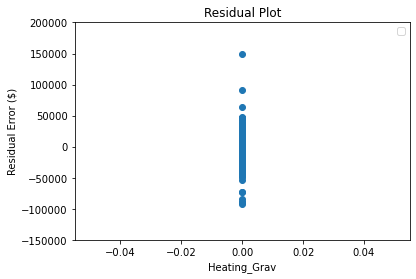

No handles with labels found to put in legend.


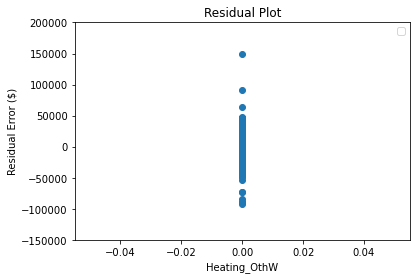

No handles with labels found to put in legend.


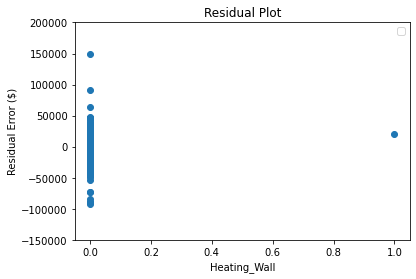

No handles with labels found to put in legend.


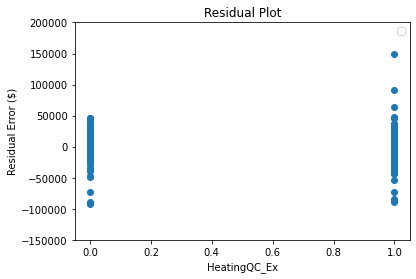

No handles with labels found to put in legend.


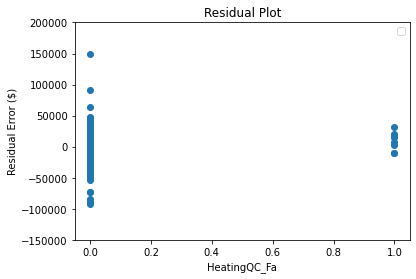

No handles with labels found to put in legend.


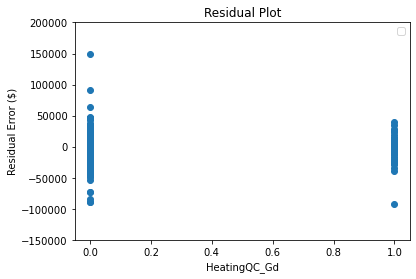

No handles with labels found to put in legend.


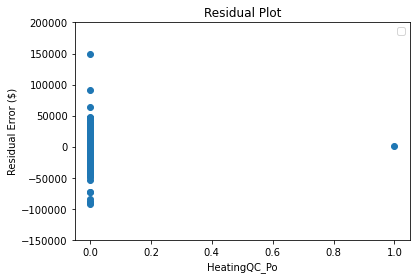

No handles with labels found to put in legend.


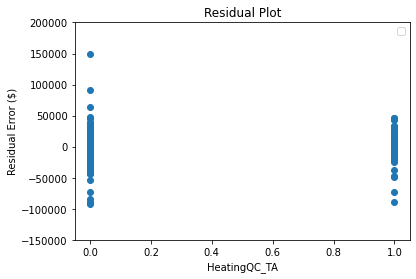

No handles with labels found to put in legend.


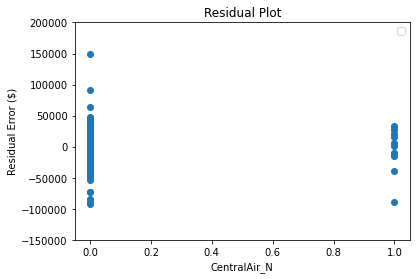

No handles with labels found to put in legend.


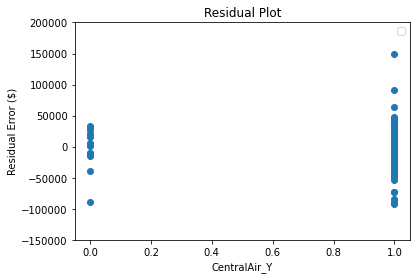

No handles with labels found to put in legend.


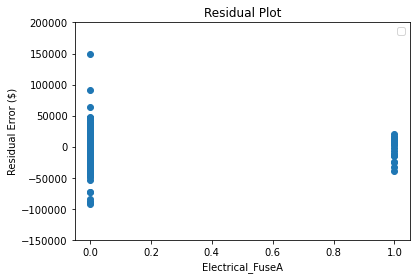

No handles with labels found to put in legend.


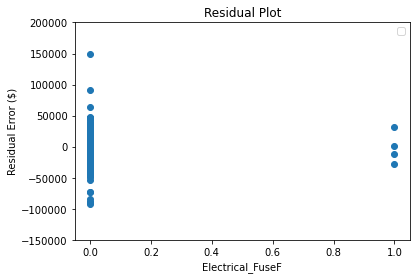

No handles with labels found to put in legend.


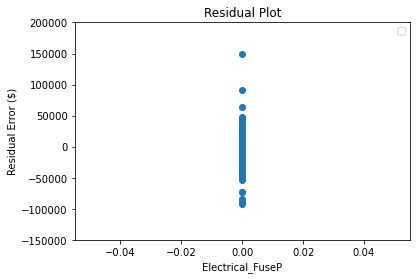

No handles with labels found to put in legend.


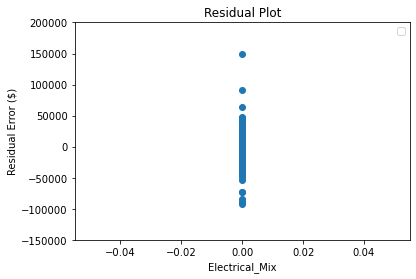

No handles with labels found to put in legend.


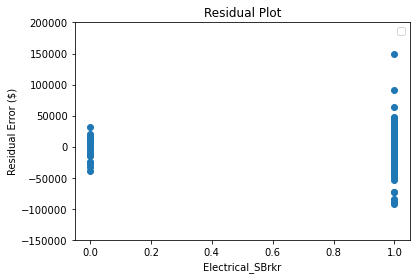

No handles with labels found to put in legend.


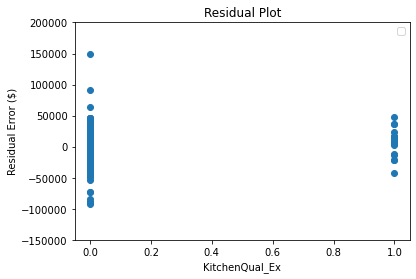

No handles with labels found to put in legend.


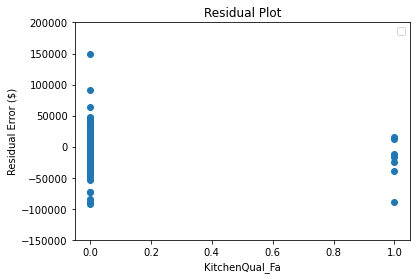

No handles with labels found to put in legend.


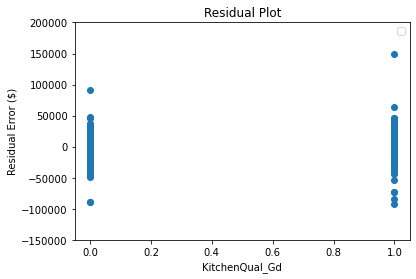

No handles with labels found to put in legend.


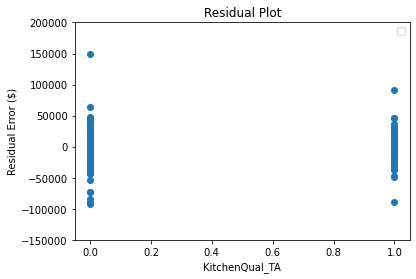

No handles with labels found to put in legend.


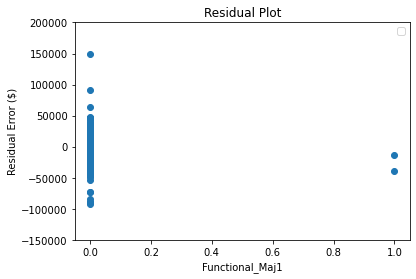

No handles with labels found to put in legend.


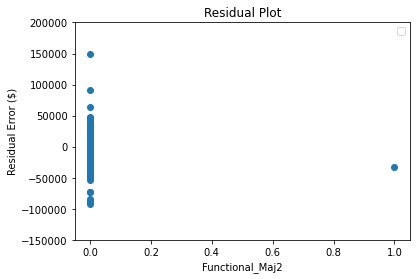

No handles with labels found to put in legend.


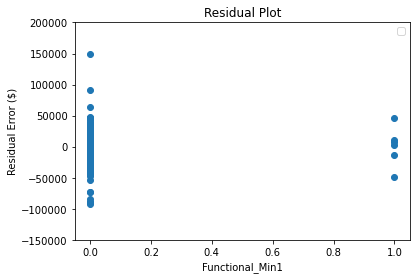

No handles with labels found to put in legend.


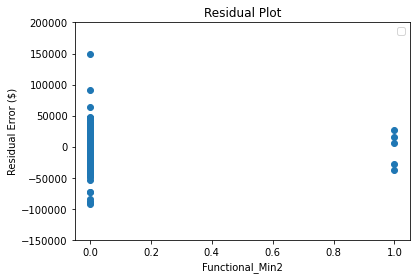

No handles with labels found to put in legend.


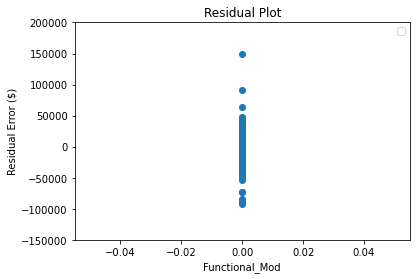

No handles with labels found to put in legend.


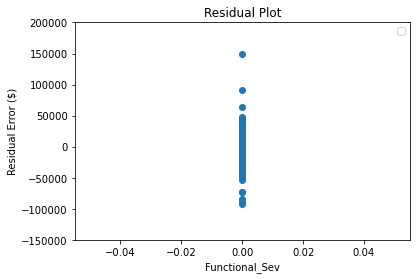

No handles with labels found to put in legend.


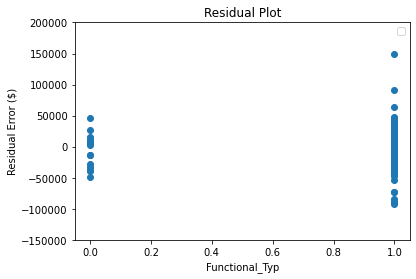

No handles with labels found to put in legend.


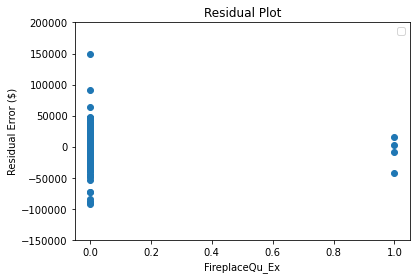

No handles with labels found to put in legend.


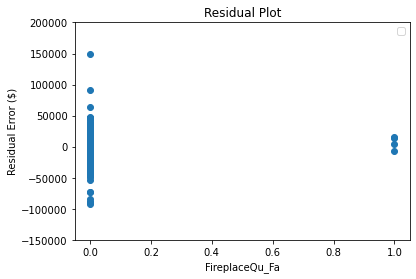

No handles with labels found to put in legend.


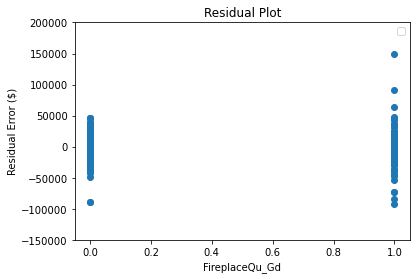

No handles with labels found to put in legend.


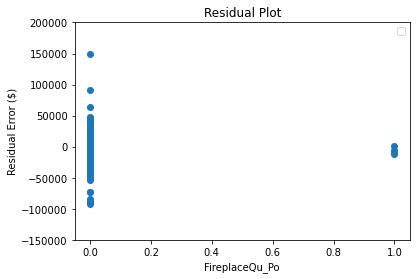

No handles with labels found to put in legend.


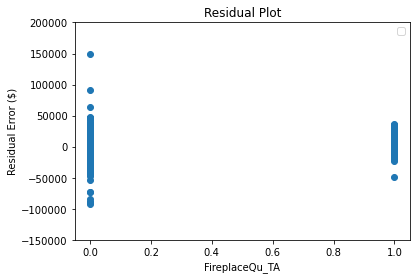

No handles with labels found to put in legend.


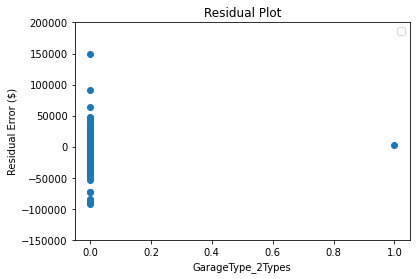

No handles with labels found to put in legend.


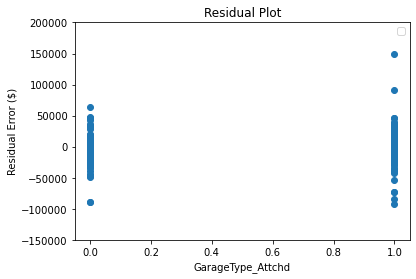

No handles with labels found to put in legend.


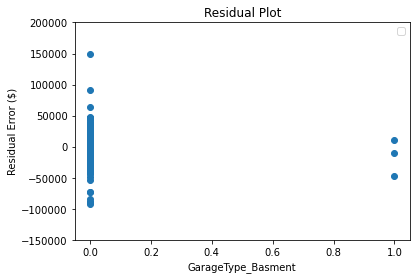

No handles with labels found to put in legend.


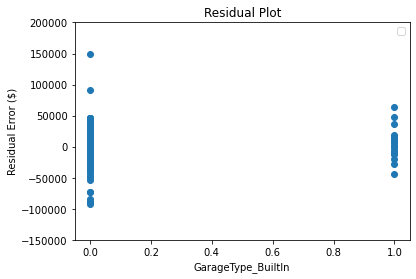

No handles with labels found to put in legend.


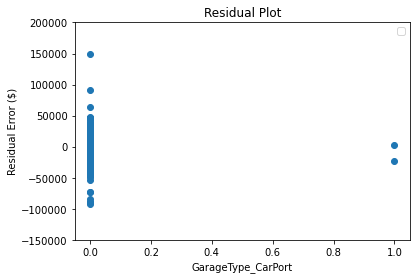

No handles with labels found to put in legend.


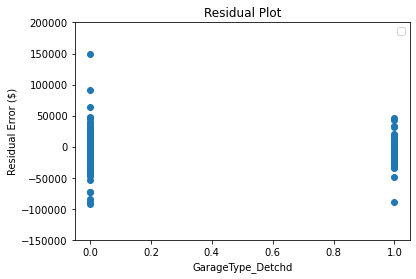

No handles with labels found to put in legend.


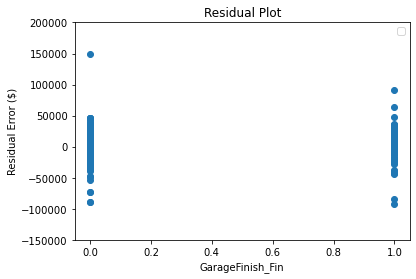

No handles with labels found to put in legend.


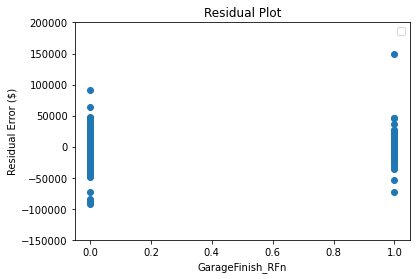

No handles with labels found to put in legend.


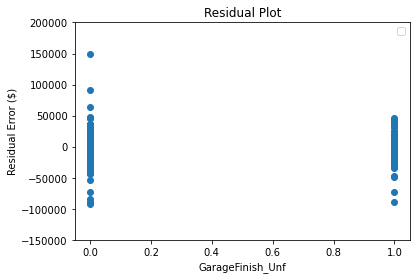

No handles with labels found to put in legend.


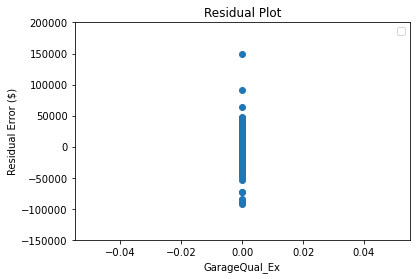

No handles with labels found to put in legend.


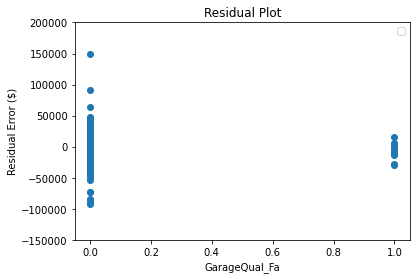

No handles with labels found to put in legend.


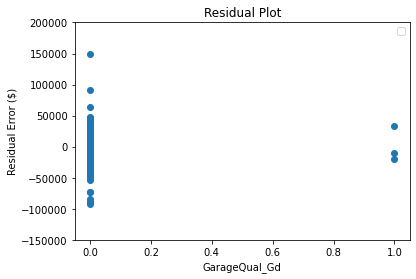

No handles with labels found to put in legend.


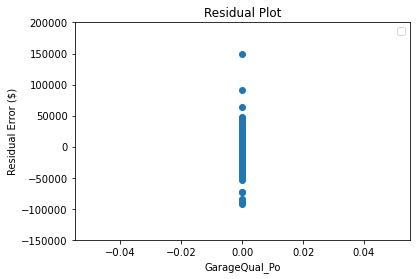

No handles with labels found to put in legend.


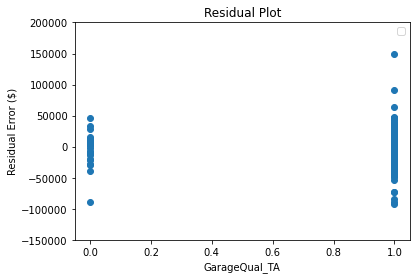

No handles with labels found to put in legend.


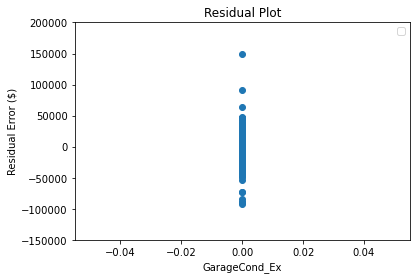

No handles with labels found to put in legend.


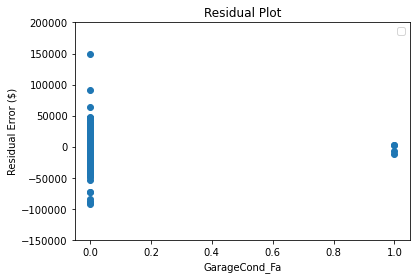

No handles with labels found to put in legend.


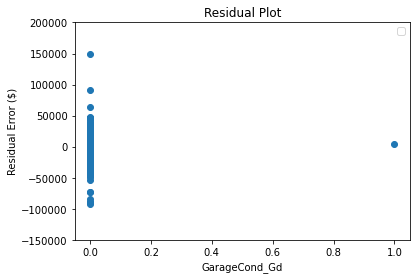

No handles with labels found to put in legend.


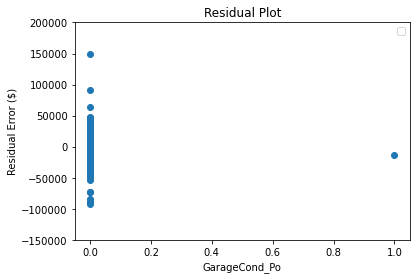

No handles with labels found to put in legend.


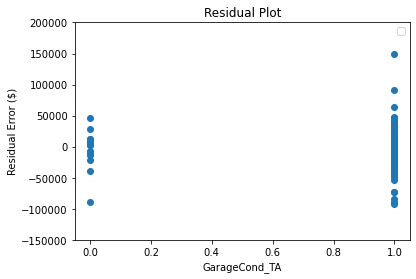

No handles with labels found to put in legend.


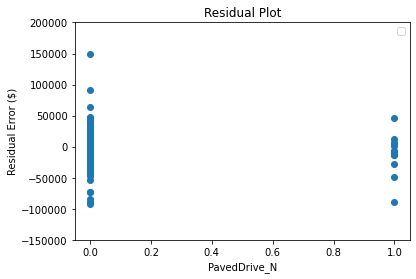

No handles with labels found to put in legend.


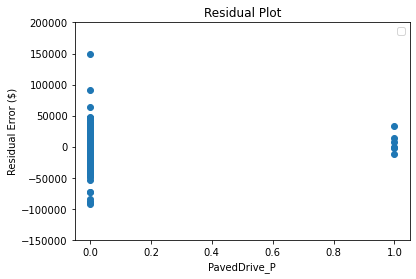

No handles with labels found to put in legend.


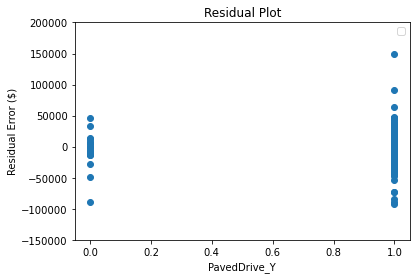

No handles with labels found to put in legend.


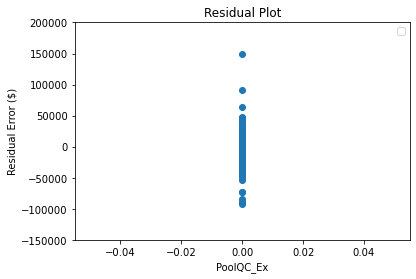

No handles with labels found to put in legend.


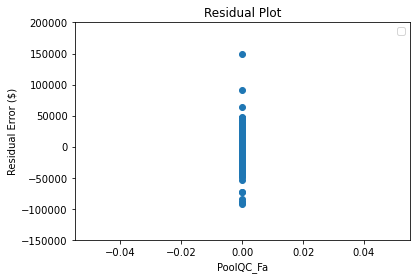

No handles with labels found to put in legend.


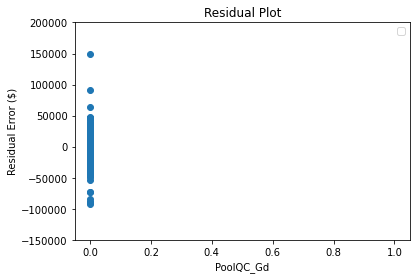

No handles with labels found to put in legend.


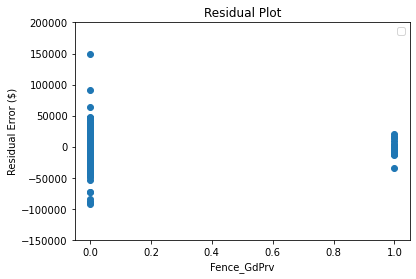

No handles with labels found to put in legend.


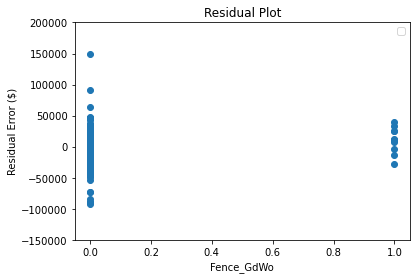

No handles with labels found to put in legend.


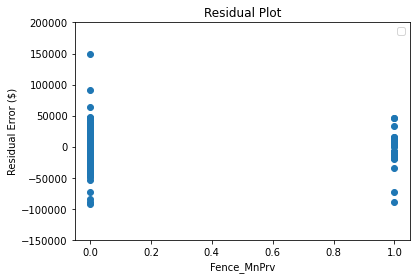

No handles with labels found to put in legend.


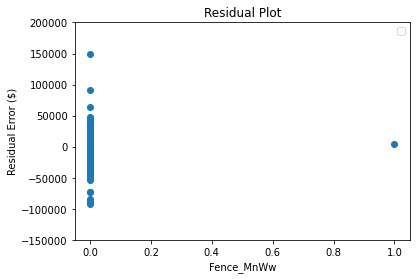

No handles with labels found to put in legend.


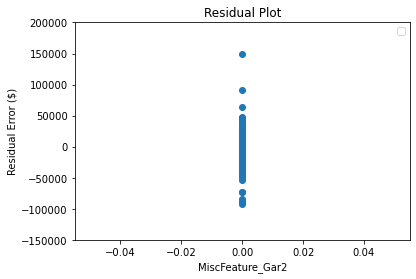

No handles with labels found to put in legend.


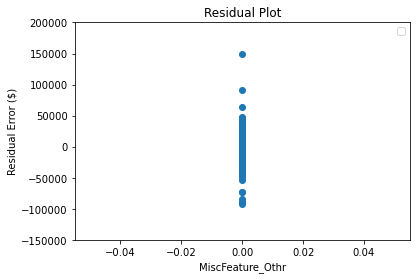

No handles with labels found to put in legend.


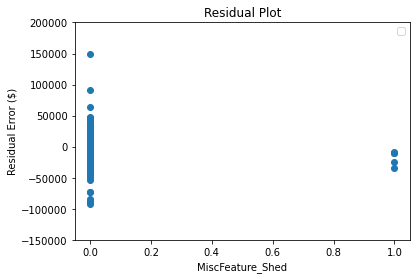

No handles with labels found to put in legend.


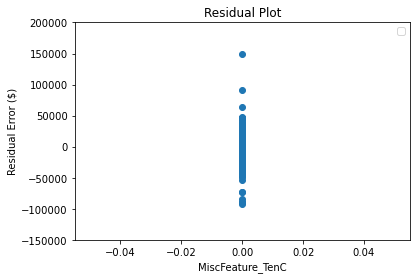

No handles with labels found to put in legend.


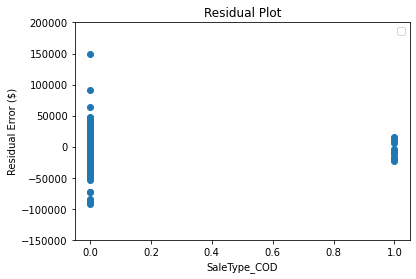

No handles with labels found to put in legend.


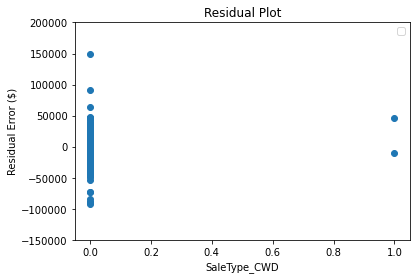

No handles with labels found to put in legend.


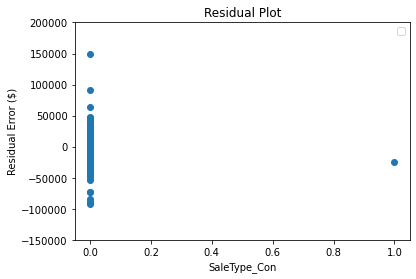

No handles with labels found to put in legend.


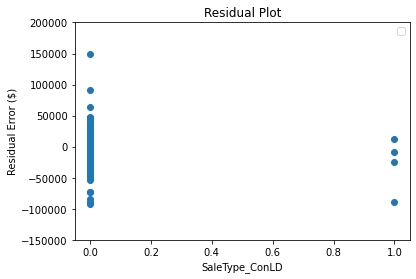

No handles with labels found to put in legend.


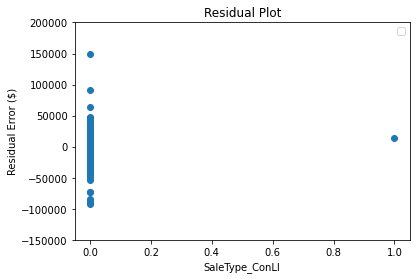

No handles with labels found to put in legend.


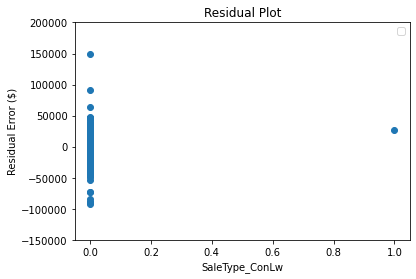

No handles with labels found to put in legend.


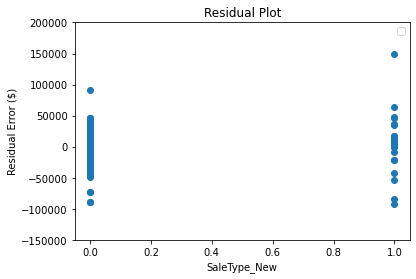

No handles with labels found to put in legend.


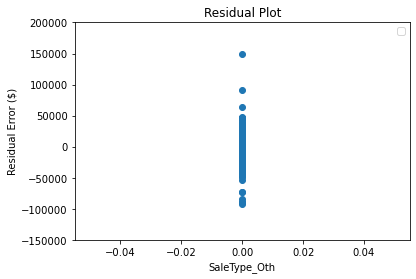

No handles with labels found to put in legend.


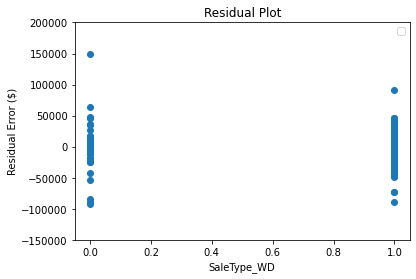

No handles with labels found to put in legend.


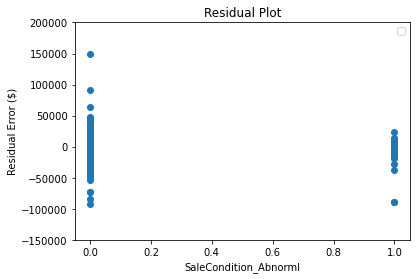

No handles with labels found to put in legend.


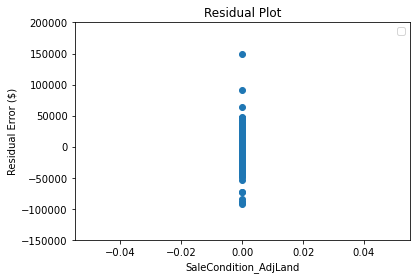

No handles with labels found to put in legend.


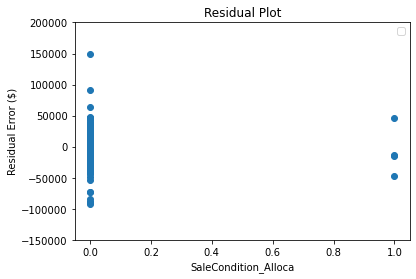

No handles with labels found to put in legend.


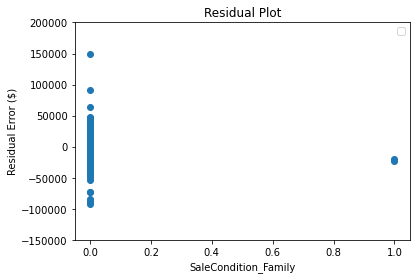

No handles with labels found to put in legend.


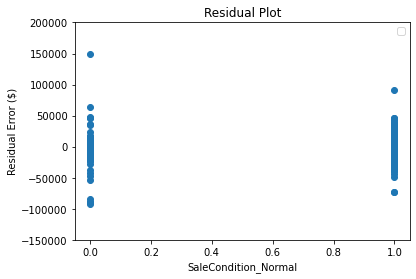

No handles with labels found to put in legend.


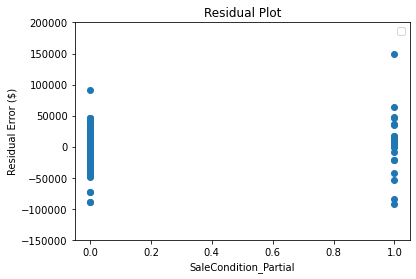

No handles with labels found to put in legend.


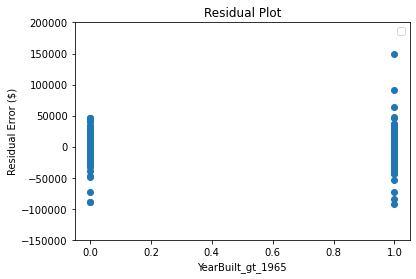

No handles with labels found to put in legend.


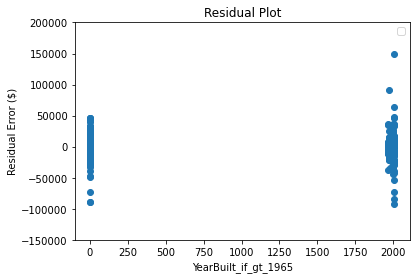

In [213]:
residuals = y_pred_test-y_test
for x_colname in X_test.columns:

    figure = plt.figure()
    ax = plt.gca()
    ax.scatter(X_test[x_colname], residuals)
    ax.set_xlabel(x_colname)
    ax.set_ylabel("Residual Error ($)")
    plt.ylim(-150_000, 200_000)
    ax.set_title("Residual Plot")

    plt.legend()
    plt.show()

In [395]:
residuals.max()

928098.3828478348

In [396]:
y_pred_test.max()

1042453.3502658037

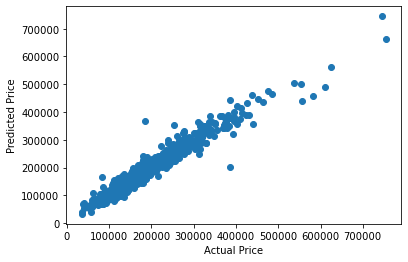

In [397]:
# Plot y_pred_train vs y_train

plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()

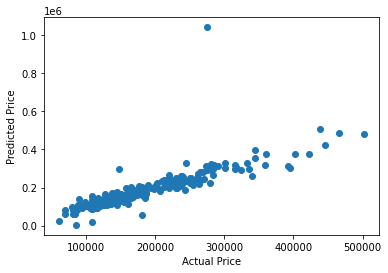

In [398]:
# Plot y_pred_test vs y_test

plt.scatter(y_test,y_pred_test)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.show()